## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import unicodedata


### 1.1 Data imports

In [2]:
# print current working directory
import os
print(os.getcwd())

/Users/Silja/Documents/thesis_yufei/data


In [59]:
content_raw = pd.read_pickle('./../00_update/speech_content.pkl')
contributions_raw = pd.read_pickle('./../00_update/contributions_simplified.pkl')
politicians_raw = pd.read_csv('./../00_update/politicians.csv')
factions_raw = pd.read_pickle('./../00_update/factions.pkl')
topics_raw = pd.read_csv('./../00_update/speech_content_topics.csv', index_col=0)

In [4]:
content_raw.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640753200.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640753200.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640753200.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",-640753200.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640753200.0


In [5]:
# show shape of the df
print(content_raw.shape)

#download head as excel
#content_raw.head().to_excel('content_raw_head.xlsx')


(970815, 14)


In [6]:
politicians_raw.tail()

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name
19630,11002597,11,5,Friedrich,Zimmermann,München,Deutschland,18.07.1925,16.09.2012,männlich,"Rechtsanwalt, Bundesminister für Verkehr",NaN,NaN,Dr.,Regierungsmitglied,Verkehr
19631,11002597,12,5,Friedrich,Zimmermann,München,Deutschland,18.07.1925,16.09.2012,männlich,"Rechtsanwalt, Bundesminister für Verkehr",NaN,NaN,Dr.,Regierungsmitglied,Verkehr
19632,11003870,15,25,Brigitte,Zypries,Kassel,Deutschland,16.11.1953,-1,weiblich,"Bundesministerin für Wirtschaft und Energie, J...",NaN,NaN,NaN,Regierungsmitglied,Justiz
19633,11003870,16,25,Brigitte,Zypries,Kassel,Deutschland,16.11.1953,-1,weiblich,"Bundesministerin für Wirtschaft und Energie, J...",NaN,NaN,NaN,Regierungsmitglied,Justiz
19634,11003870,19,25,Brigitte,Zypries,Kassel,Deutschland,16.11.1953,-1,weiblich,"Bundesministerin für Wirtschaft und Energie, J...",NaN,NaN,NaN,Regierungsmitglied,Wirtschaft und Energie


In [7]:
politicians_raw.shape

(19635, 16)

In [8]:
factions_raw.head(50)

,id,abbreviation,faction_name
0,0,AfD,Fraktion Alternative für Deutschland
1,2,BP,Fraktion Bayernpartei
2,4,Bündnis 90/Die Grünen,Fraktion BÜNDNIS 90/DIE GRÜNEN
3,7,DIE LINKE.,Fraktion DIE LINKE.
4,9,DP/DPB,Fraktion DP/DPB (Gast)
5,12,DRP,Fraktion DRP (Gast)
6,6,DA,Fraktion Demokratische Arbeitsgemeinschaft
7,8,DP,Fraktion Deutsche Partei
8,11,DPB,Fraktion Deutsche Partei Bayern
9,9,DP/DPB,Fraktion Deutsche Partei/Deutsche Partei Bayern


In [9]:
contributions_raw.head(5)

,text_position,content,speech_id
0,0.0,(Nellen),1.0
0,1.0,"(Nrn. 1800, zu 1800, 3300, zu 3300 der Drucksa...",2.0
1,0.0,(Drucksache Nr. 3308),2.0
0,1.0,(Zurufe: Wiederholen!),4.0
1,0.0,(Zurufe: Sofort!),4.0


In [10]:
contributions_raw.shape

(1966165, 3)

In [11]:
#topics_raw.head()

### 1.2 Addtitional data


In [12]:
cities_with_info_raw = pd.read_excel('05-staedte.xlsx')
cities_with_info_raw.head()

,Lfd. Nr.,Land,RB,Kreis,Verb,Gem,Stadt,Post-leitzahl 1),Fläche in km2 2),Bevölkerung3),Männlich,Weiblich,je km2
0,1,11.0,0.0,0.0,0.0,0.0,"Berlin, Stadt",10178.0,891.12,3755251.0,1843196.0,1912055.0,4214.0
1,2,2.0,0.0,0.0,0.0,0.0,"Hamburg, Freie und Hansestadt",20095.0,755.09,1892122.0,925616.0,966506.0,2506.0
2,3,9.0,1.0,62.0,0.0,0.0,"München, Landeshauptstadt",80331.0,310.70,1512491.0,736806.0,775685.0,4868.0
3,4,5.0,3.0,15.0,0.0,0.0,"Köln, Stadt",50667.0,405.02,1084831.0,526588.0,558243.0,2678.0
4,5,6.0,4.0,12.0,0.0,0.0,"Frankfurt am Main, Stadt",60311.0,248.31,773068.0,380566.0,392502.0,3113.0


## 2. Data Cleaning

### 2.1 Duplicates

In [13]:
content = content_raw.copy()

# Check for duplicates
print(content.duplicated().sum())

# Remove duplicates
content.drop_duplicates(inplace=True)

# show duplicates of ids
content[content.duplicated(subset='id', keep=False)].sort_values(by='id')

0


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date


In [14]:
len(content)

970815

In [15]:
#check for duplicate content, also trimming the content as there might be variations at the end.
# a length of 200 characters ensures that there are duplicates for sure

# trim length of content to 200 caracters
content['content_trimmed'] = content['speech_content'].str[:200]

duplicates=content[
    content.duplicated(
        subset=['politician_id', 'content_trimmed'],
        keep=False
    )
].sort_values(by=['politician_id', 'content_trimmed'])

# analyze in excel

# filter for all where length is larger than 200
duplicates = duplicates[duplicates['content_trimmed'].str.len() > 150]

#download as excel
duplicates.to_excel('duplicates_2.xlsx')

We found that the xml was not correct for 2013-06-26. Every entry is doubled in some variations. Thus, we will delete duplicates in contetnt and keep the last


In [16]:
# Delete speech_content duplicates for date: 2013-06-26 and keep the last

# Step 2: Create a temporary DataFrame for only the relevant subset
subset_df = content[(content['electoral_term'] == 17) & (content['session'] == 250)]

# Step 3: Identify 'id' values to drop by finding duplicates within this subset
# Keep only the last duplicate based on 'politician_id' and 'content_trimmed'
ids_to_drop = subset_df.duplicated(subset=['politician_id', 'content_trimmed'], keep='last')
ids_to_drop = subset_df[ids_to_drop]['id'].tolist()

# Step 4: Drop these 'id' values from the original DataFrame
content = content[~content['id'].isin(ids_to_drop)]

# drop the column content_trimmed
content.drop(columns=['content_trimmed'], inplace=True)
content.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640753200.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640753200.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640753200.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",-640753200.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,Köhler,-1,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640753200.0


In [17]:
len(content)

970351

In [18]:
# show term 17, session 250 to prove
content[(content['electoral_term'] == 17) & (content['session'] == 250)]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
1,792791,17,250,Norbert,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,,,Die Sitzung ist eröffnet. Nehmen Sie bitte Pla...,1.372280e+09
2,792792,17,250,Norbert Lammert,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Berichterstattung,-1,Presidium of Parliament,präsident,-1,,,Abgeordnete Sibylle Pfeiffer\nStefan Rebmann\n...,1.372280e+09
4,792794,17,250,Angela,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Merkel,-1,Chancellor,,11001478,Zusatzpunkt 4,a) Erste Beratung des von der Bundesregierung ...,Sehr geehrter Herr Präsident! Liebe Kolleginne...,1.372280e+09
6,792796,17,250,Peer,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Steinbrück,25,Member of Parliament,,11004165,Zusatzpunkt 4,a) Erste Beratung des von der Bundesregierung ...,Herr Präsident! Meine lieben Kolleginnen und K...,1.372280e+09
7,792797,17,250,Norbert,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Lammert,-1,Presidium of Parliament,präsident,11001274,Zusatzpunkt 4,a) Erste Beratung des von der Bundesregierung ...,Ich eröffne die Aussprache. Das Wort erhält al...,1.372280e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,793796,17,250,Claudia,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Bögel,15,Member of Parliament,,11004015,Tagesordnungspunkt 68,Absetzung der,Die Debatte um das Thema Netzneutralität wird\...,1.372280e+09
1007,793797,17,250,Halina,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Wawzyniak,7,Member of Parliament,,11004185,Tagesordnungspunkt 68,Absetzung der,Fast über die ganze Legislaturperiode hinweg b...,1.372280e+09
1008,793798,17,250,Halina,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Wawzyniak,7,Member of Parliament,,11004185,Tagesordnungspunkt 68,Absetzung der,Fast über die ganze Legislaturperiode hinweg b...,1.372280e+09
1010,793800,17,250,Konstantin,https://dip21.bundestag.de/dip21/btp/17/17250.pdf,Notz,4,Member of Parliament,,11004123,Tagesordnungspunkt 68,Absetzung der,Lassen sich mich gleich zu Beginn sagen: Mit d...,1.372280e+09


Also, we realized that some sessionns are in there twice, we will delete accordingly

In [19]:
# delete sessions: electoral term 1, session 21; electoral term 1, session 149; electoral term 1, session 76; electoral term 2, session 219; elecoral term 2, session 226

# Define the list of (electoral_term, session) pairs you want to delete
sessions_to_delete = [
    (1, 21), 
    (1, 149), 
    (1, 76), 
    (2, 219), 
    (2, 226)
]

# Use .isin() with a multi-column filter to exclude these rows
content = content[~content[['electoral_term', 'session']].apply(tuple, axis=1).isin(sessions_to_delete)]

# Reset index if desired (optional)
content = content.reset_index(drop=True)

In [20]:
len(content)

969857

In [21]:
politicians = politicians_raw.copy()

# Check for duplicates
print(politicians.duplicated().sum())

# Remove duplicates
politicians.drop_duplicates(inplace=True)

# show duplicates of ids and electoral terms
politicians[politicians.duplicated(subset=['ui', 'electoral_term'], keep=False)].sort_values(by=['ui', 'electoral_term'])


# Remove duplications: keep one name if namechange (marriage), keep only longest academic title if multiple, keep only one faction if multiple
# Step 1: Function to consolidate values, including longest title, actual faction, institution name, and name streamlining
def consolidate_group(group):
    # 1. Longest academic title
    longest_title_idx = group['academic_title'].dropna().str.len().idxmax() if not group['academic_title'].dropna().empty else None
    if longest_title_idx is not None:
        longest_title = group.loc[longest_title_idx, 'academic_title']
        group['academic_title'] = group['academic_title'].fillna(longest_title)  # Fill if we found a valid longest title

    # 2. Faction: prefer entries with a valid faction (i.e., non-null faction_id and non-Fraktionslos)
    valid_faction = group.loc[group['faction_id'].notnull()]
    if not valid_faction.empty:
        valid_faction_row = valid_faction.iloc[0]  # Take the first valid faction row
        group['faction_id'] = group['faction_id'].fillna(valid_faction_row['faction_id'])
        group['institution_name'] = group['institution_name'].fillna(valid_faction_row['institution_name'])

    # 3. Streamline names: prioritize the most recent last name and first name
    most_recent_entry = group.iloc[-1]  # Take the most recent entry as the baseline for names
    group['last_name'] = group['last_name'].fillna(most_recent_entry['last_name'])
    group['first_name'] = group['first_name'].fillna(most_recent_entry['first_name'])

    # 4. Prefer ui that is not -1 and does not start with 9
    valid_ui = group.loc[(group['ui'] != -1) & (~group['ui'].astype(str).str.startswith('9'))]
    if not valid_ui.empty:
        valid_ui_row = valid_ui.iloc[0]  # Take the first valid ui row
        group['ui'] = group['ui'].fillna(valid_ui_row['ui'])

    return group

# Step 2: Apply the function, grouping by both 'ui' and 'electoral_term'
politicians = politicians.groupby(['ui', 'electoral_term']).apply(consolidate_group)

# Optional: Reset index if needed
politicians.reset_index(drop=True, inplace=True)

# Step 3: Drop duplicates within each group, keeping the relevant rows --> otherwise dfs cannot be merged
politicians['ui'] = politicians['ui'].astype(int)
politicians['electoral_term'] = politicians['electoral_term'].astype(int)
politicians = politicians.drop_duplicates(subset=['ui', 'electoral_term'], keep='first')

unique_combinations = politicians[['ui', 'electoral_term']].drop_duplicates()
print('unique politicians after dupl removal:', len(unique_combinations))

759
unique politicians after dupl removal: 12492


In [22]:
# Check for politicians with the same name but different uis in the same electoral term
duplicate_names = (
    politicians.groupby(['electoral_term','first_name', 'last_name'])
    .filter(lambda group: group['ui'].nunique() > 1)  # Only keep groups with more than one unique 'ui'
)

# Step 2: Display the result
duplicate_names

duplicate_name_df = politicians.groupby(['first_name', 'last_name']).filter(lambda x: x['ui'].nunique() > 1)

# Display the filtered DataFrame
duplicate_name_df = duplicate_name_df.sort_values(['first_name', 'last_name', 'ui']).reset_index(drop=True)
duplicate_name_df

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name
0,11001769,5,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
1,11001769,6,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
2,11001769,7,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
3,11001769,8,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
4,11001769,9,5,Alois,Rainer,Untergrub / Landkreis Straubing-Bogen,Deutschland,16.06.1921,14.03.2002,männlich,"Metzger, Gast- und Landwirt",NaN,NaN,NaN,Fraktion/Gruppe,Fraktion der Christlich Demokratischen Union/C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,11002022,15,25,Wilhelm,Schmidt,Barbecke / Krs. Peine,Deutschland,13.05.1944,-1,männlich,Kommunalbeamter a. D.,Salzgitter,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...
103,11002023,6,25,Wolfgang,Schmidt,Niederselters,Deutschland,18.04.1934,22.05.2000,männlich,Luftfahrtangestellter,Niederselters,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...
104,11002023,7,25,Wolfgang,Schmidt,Niederselters,Deutschland,18.04.1934,22.05.2000,männlich,Luftfahrtangestellter,Niederselters,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...
105,11002023,8,25,Wolfgang,Schmidt,Niederselters,Deutschland,18.04.1934,22.05.2000,männlich,Luftfahrtangestellter,Niederselters,NaN,NaN,Fraktion/Gruppe,Fraktion der Sozialdemokratischen Partei Deuts...


In [23]:
# show all whre ui is -1 or starts with 9
politicians[(politicians['ui'] == -1) | (politicians['ui'].astype(str).str.startswith('9'))]

,ui,electoral_term,faction_id,first_name,last_name,birth_place,birth_country,birth_date,death_date,gender,profession,constituency,aristocracy,academic_title,institution_type,institution_name


Even though there are some different values, the politician id seems unique in most cases

### 2.2 Missing Values

In [24]:
# Check for missing values in each column
print(content.isnull().sum())

# Check for values = -1 in each column
print((content == -1).sum())

# convert all -1 into NaN
content.replace(-1, np.nan, inplace=True)

# convert all "Not found" into NaN
content.replace('Not found', np.nan, inplace=True)
content.replace('Not found ', np.nan, inplace=True)

print(content.isnull().sum())

# Problem with missing politician_id and faction_id

# calculate percentag of how many politician_ids are missing
politician_id_missing = content['politician_id'].isnull().sum()
politician_id_total = len(content)
politician_id_missing_percentage = politician_id_missing / politician_id_total * 100
print(f'Missing politician_id: {politician_id_missing} ({politician_id_missing_percentage:.2f}%)')


id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id             0
position_short         0
position_long      60625
politician_id          0
top_item          640052
top_title         640052
speech_content         0
date                   0
dtype: int64
id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id        608416
position_short         0
position_long          0
politician_id      37818
top_item               0
top_title              0
speech_content         0
date                   0
dtype: int64
id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id        608416
position_short     42858
position_long      60625
politician_id      37818
top_item          640052

In [25]:
# check for missing values in each column politicians
print(politicians.isnull().sum())

# check for values = -1 in each column politicians
print((politicians == -1).sum())

# convert all -1 into NaN
politicians.replace(-1, np.nan, inplace=True)

print(politicians.isnull().sum())


ui                      0
electoral_term          0
faction_id              0
first_name              0
last_name               0
birth_place            26
birth_country          22
birth_date              0
death_date              0
gender                 22
profession             40
constituency        10776
aristocracy         12390
academic_title       9159
institution_type        0
institution_name        0
dtype: int64
ui                   0
electoral_term       0
faction_id          39
first_name           0
last_name            0
birth_place          0
birth_country        0
birth_date           0
death_date           0
gender               0
profession           0
constituency         0
aristocracy          0
academic_title       0
institution_type     0
institution_name     0
dtype: int64
ui                      0
electoral_term          0
faction_id             39
first_name              0
last_name               0
birth_place            26
birth_country          22
birth_da

In [26]:
# missing values in contribution df
print(contributions_raw.isnull().sum())


text_position    0
content          0
speech_id        0
dtype: int64


### 2.3 Fill missing values

In [27]:
# Match Politician ID based on name and electoral term
politicians['first_name'] = politicians['first_name'].str.lower()
politicians['last_name'] = politicians['last_name'].str.lower()

content['first_name'] = content['first_name'].str.lower()
content['last_name'] = content['last_name'].str.lower()


# show duplicated of first name, last name and electoral term
duplicated_names_terms = politicians[politicians.duplicated(subset=['first_name', 'last_name', 'electoral_term'], keep=False)].sort_values(by=['first_name', 'last_name', 'electoral_term'])

print(len(duplicated_names_terms))

#since there are only 8 duplicates of first_name, last_name, and electoral term; we can use the ui to match the speeches

# to have a clean match, we need to remove the duplicates
politicians_cleaned_name_term_only = politicians.drop_duplicates(subset=['first_name', 'last_name', 'electoral_term'], keep='first')  


6


In [28]:
# Match Politician ID based on name and electoral term only if there is no ambiguity

content_filled = pd.merge(content, politicians_cleaned_name_term_only[['ui', 'first_name', 'last_name', 'electoral_term']], how='left',
                    left_on=['first_name', 'last_name', 'electoral_term'], right_on=['first_name', 'last_name', 'electoral_term'])

content_filled.head()

# if politician_id is na, fill with ui
content_filled['politician_id'] = content_filled['politician_id'].fillna(content_filled['ui'])



content_filled.drop(columns=['ui'], inplace=True)
content_filled.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640753200.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640753200.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640753200.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",-640753200.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640753200.0


In [29]:
#Check for correct merge
print(len(content_filled))
content_filled

969857


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-6.407532e+08
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-6.407532e+08
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-6.407532e+08
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",-6.407532e+08
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,NaN,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-6.407532e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969852,1124124,20,16,lennard,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,oehl,NaN,NaN,None,11005170.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,Sehr geehrte Frau Präsidentin! Sehr geehrte Da...,1.644970e+09
969853,1124125,20,16,yvonne,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,magwas,NaN,Presidium of Parliament,Vizepräsidentin,11004346.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,"Ich erteile das Wort Dr. Stefan Heck, CDU/CSU-...",1.644970e+09
969854,1124126,20,16,stefan,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,heck,NaN,NaN,None,11004294.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,Frau Präsidentin! Meine sehr geehrten Damen un...,1.644970e+09
969855,1124127,20,16,yvonne,https://dip21.bundestag.de/dip21/btp/20/20016.pdf,magwas,NaN,Presidium of Parliament,Vizepräsidentin,11004346.0,Zusatzpunkt 1,Aktuelle Stunde auf Verlangen der Fraktionen S...,Der letzte Redner in dieser Runde ist Uli Gröt...,1.644970e+09


In [30]:
# show where politician id is na and electoral period 18
content_filled[(content_filled['politician_id'].isnull()) & (content_filled['electoral_term'] == 18)]

# The name Tomas de Maizere was often misinterpreted, we will fix it in the following way:
# if first_name tomas maizi, fill first name with Thomas, last name Maizière, faction_id 5, position_short Minister, politician id 11004105
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'last_name'] = 'maizière'
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'faction_id'] = 5
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'position_short'] = 'Minister'
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'politician_id'] = 11004105
content_filled.loc[(content_filled['first_name'] == 'thomas maizi'), 'first_name'] = 'Thomas'

content_filled[(content_filled['politician_id'].isnull()) & (content_filled['electoral_term'] == 18)]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
793179,794137,18,2,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 2,Vereinbarte Debatte: zu den Abhöraktivitäten d...,Frau Präsidentin! Meine verehrten Damen und He...,1.384726e+09
793181,794139,18,2,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18002.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 2,Vereinbarte Debatte: zu den Abhöraktivitäten d...,Nein. Diese Dinge sind für mich ausdiskutiert ...,1.384726e+09
793321,794279,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,Tagesordnungspunkt 6,Fragestunde\n(Drucksache 18/87). . . . . . . ....,"Frau Kollegin Groth, die Bundesregierung setzt...",1.385590e+09
793325,794283,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,Tagesordnungspunkt 6,Fragestunde\n(Drucksache 18/87). . . . . . . ....,"Frau Kollegin, ich habe ja gerade gesagt - dar...",1.385590e+09
793328,794286,18,3,ernst,https://dip21.bundestag.de/dip21/btp/18/18003.pdf,burgbacher,NaN,Secretary of State,parl. staatssekretär beim bundesminister für w...,NaN,Tagesordnungspunkt 6,Fragestunde\n(Drucksache 18/87). . . . . . . ....,"Herr Kollege, auch darüber haben wir ausführli...",1.385590e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842794,843752,18,233,claudia roth,https://dip21.bundestag.de/dip21/btp/18/18233.pdf,https,NaN,Presidium of Parliament,vizepräsidentin,NaN,Tagesordnungspunkt 2,"Fragestunde\nDrucksachen 18/12321, 18/12352 . ...",//www.zukunft-erdgas.info/fileadmin/public/PDF...,1.494968e+09
842860,843818,18,233,merkel die heute,https://dip21.bundestag.de/dip21/btp/18/18233.pdf,sagte,NaN,Chancellor,,NaN,Tagesordnungspunkt 4,Beschlussempfehlung und Bericht des Ausschusse...,Für Integration müssen wir uns\naufeinander ei...,1.494968e+09
843338,844296,18,235,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18235.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 39,Antrag der Abgeordneten Marieluise Beck\n(Brem...,Frau Präsidentin! Meine verehrten Kolleginnen ...,1.495141e+09
844350,845308,18,239,hans-peter,https://dip21.bundestag.de/dip21/btp/18/18239.pdf,uhl,5.0,Member of Parliament,,NaN,Tagesordnungspunkt 6,Unterrichtung durch die Bundesregierung: Beric...,Frau Präsidentin! Meine verehrten Kolleginnen ...,1.497992e+09


31725


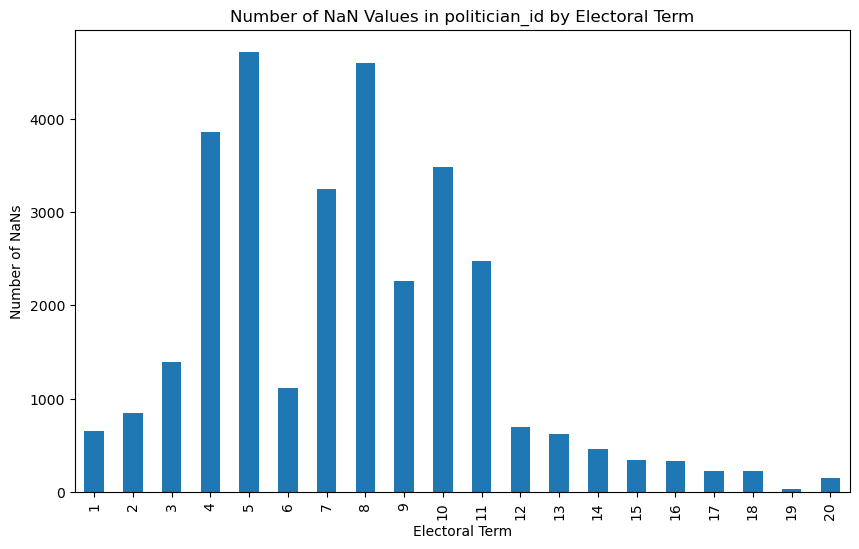

In [31]:
# Step 1: Check for NaN values in the 'politician_id' column
content_filled['politician_id_isnull'] = content_filled['politician_id'].isnull()

# Step 2: Group by 'electoral_term' and sum the NaN counts
nans_by_electoral_term = content_filled.groupby('electoral_term')['politician_id_isnull'].sum()

#print number of all nans
print(content_filled['politician_id_isnull'].sum())

# Step 3: Plot the result as a bar graph
nans_by_electoral_term.plot(kind='bar', figsize=(10,6))
plt.title('Number of NaN Values in politician_id by Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Number of NaNs')
plt.show()

# In the preiod of interest, almost all politician IDs are there

In [32]:
# calculate again percentage of missing politician ids in whole df
politician_id_missing = content_filled['politician_id'].isnull().sum()
politician_id_total = len(content_filled)
politician_id_missing_percentage = politician_id_missing / politician_id_total * 100
print(f'Missing politician_id: {politician_id_missing} ({politician_id_missing_percentage:.2f}%)')


Missing politician_id: 31725 (3.27%)


The amount of rows without politician IDs in our periods of interest is very low. We will procees without trying to fill them further,

In [33]:
content_filled2 = content_filled.copy()
content_filled2.drop(columns=['politician_id_isnull'], inplace=True)

# show where faction_id in na
content_filled2[content_filled2['faction_id'].isnull()]

# fill faction id based on politician id and electoral term
content_filled2 = pd.merge(content_filled2, politicians[['ui', 'faction_id', 'electoral_term']], how='left',
                    left_on=['politician_id', 'electoral_term'], right_on=['ui', 'electoral_term'])

# if faction_id_x is na, fill with faction_id_y
content_filled2['faction_id_x'] = content_filled2['faction_id_x'].fillna(content_filled2['faction_id_y'])
content_filled2.drop(columns=['ui', 'faction_id_y'], inplace=True)
content_filled2.rename(columns={'faction_id_x': 'faction_id'}, inplace=True)

In [34]:
content_filled.isnull().sum()

id                           0
electoral_term               0
session                      0
first_name                   0
document_url                 0
last_name                    0
faction_id              608070
position_short           42858
position_long            60625
politician_id            31725
top_item                640052
top_title               640052
speech_content               0
date                         0
politician_id_isnull         0
dtype: int64

In [35]:
# Step 1: Create a summary DataFrame with the first non-NaN position for each politician and electoral term
summary_positions = content_filled2.groupby(['electoral_term', 'politician_id']).agg({
    'position_short': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'position_long': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None
}).reset_index()

# Step 2: Merge this summary back to the original DataFrame to update NaNs
content_filled2 = content_filled2.merge(summary_positions, on=['electoral_term', 'politician_id'], suffixes=('', '_summary'), how='left')

# Step 3: Use the summary columns to fill NaN values in the original columns
content_filled2['position_short'].fillna(content_filled2['position_short_summary'], inplace=True)
content_filled2['position_long'].fillna(content_filled2['position_long_summary'], inplace=True)

# Step 4: Drop the summary columns (clean-up)
content_filled2.drop(columns=['position_short_summary', 'position_long_summary'], inplace=True)

# Display the updated DataFrame
content_filled2.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,-640753200.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",-640753200.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,-640753200.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",-640753200.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,-640753200.0


In [36]:
# replace all -1 with NaN
content_filled2.replace(-1, np.nan, inplace=True)

print(content_filled2.isnull().sum())


id                     0
electoral_term         0
session                0
first_name             0
document_url           0
last_name              0
faction_id         49831
position_short      1190
position_long      59558
politician_id      31725
top_item          640052
top_title         640052
speech_content         0
date                   0
dtype: int64


### 2.3.1 Impute BSW

In [37]:
# For all dates from 02.02.2024 input for the following ids faction_id: 3
# 11004837, 11004183, 11004911, 11004060, 11004823, 11003858, 11005007, 11005127, 11003746, 11003753
content_filled2['date'] = pd.to_datetime(content_filled2['date'], unit='s')

# Define the start date for the changes
start_date = pd.Timestamp(pd.to_datetime('2024-02-02'))

# List of politician_ids to update
politician_ids = [
    11004837, 11004183, 11004911, 11004060, 
    11004823, 11003858, 11005007, 11005127, 
    11003746, 11003753
]

# Update 'faction_id' to 3 for the specified politician_ids from 02.02.2024 onwards
content_filled2.loc[(content_filled2['date'] >= start_date) & (content_filled2['politician_id'].isin(politician_ids)), 'faction_id'] = 3

# Verify or check the changes if necessary
bsw = content_filled2[(content_filled2['date'] >= start_date) & (content_filled2['politician_id'].isin(politician_ids))]


In [38]:
factions = factions_raw.drop_duplicates(subset=['id'])

content_merged = content_filled2.merge(factions[['id', 'abbreviation']], left_on='faction_id', right_on='id', how='left')
content_merged.drop(columns=['id_y'], inplace=True)
content_merged.rename(columns={'abbreviation': 'faction', 'id_x':'id'}, inplace=True)

In [39]:
# show all where politician id starts with 9
content_merged[content_merged['politician_id'].astype(str).str.startswith('9')]


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction
846366,1000638,19,112,franziska,https://dip21.bundestag.de/dip21/btp/19/19112.pdf,giffey,NaN,Minister,"Bundesministerin für Familie, Senioren, Frauen...",999990071.0,Einzelplan 17,,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,2019-09-12,NaN
846480,1000752,19,115,svenja,https://dip21.bundestag.de/dip21/btp/19/19115.pdf,schulze,NaN,Minister,"Bundesministerin für Umwelt, Naturschutz und n...",999990074.0,Zusatzpunkt 2,Vereinbarte Debatte: Klimaschutzprogramm 2030,Herr Präsident! Sehr geehrte Damen und Herren ...,2019-09-26,NaN
846769,1001041,19,115,annegret,https://dip21.bundestag.de/dip21/btp/19/19115.pdf,kramp-karrenbauer,NaN,Minister,Bundesministerin der Verteidigung,999990083.0,Zusatzpunkt 12,Antrag der Bundesregierung: Einsatz bewaffnete...,Vielen Dank. – Herr Präsident! Meine sehr geeh...,2019-09-26,NaN
847041,1001313,19,141,benjamin-immanuel,https://dip21.bundestag.de/dip21/btp/19/19141.pdf,hoff,NaN,Minister,Minister (Thüringen),999990091.0,Tagesordnungspunkt 19,Unterrichtung durch die Bundesregierung: Agrar...,Herr Präsident! Sehr geehrte Damen und Herren!...,2020-01-17,NaN
848286,1002558,19,184,sylvia,https://dip21.bundestag.de/dip21/btp/19/19184.pdf,lehmann,NaN,None,None,999990088.0,Tagesordnungspunkt 29,Zweite und dritte Beratung des von der Bundesr...,Der AfD wünschen wir wenig nahestehende Person...,2020-10-09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969125,1123397,20,27,svenja,https://dip21.bundestag.de/dip21/btp/20/20027.pdf,schulze,NaN,Minister,Bundesministerin für wirtschaftliche Zusammena...,999990074.0,Tagesordnungspunkt 3,Vereinbarte Debatte zum 30. Jahrestag des Krie...,Frau Präsidentin! Liebe Kolleginnen und Kolleg...,2022-04-06,NaN
969384,1123656,20,11,anne,https://dip21.bundestag.de/dip21/btp/20/20011.pdf,spiegel,NaN,Minister,"Bundesministerin für Familie, Senioren, Frauen...",999990122.0,Tagesordnungspunkt 2,Vereinbarte Debatte zur Politik der Bundesregi...,Sehr geehrte Frau Präsidentin! Sehr geehrte Ab...,2022-01-13,NaN
969500,1123772,20,11,klara,https://dip21.bundestag.de/dip21/btp/20/20011.pdf,geywitz,NaN,Minister,"Bundesministerin für Wohnen, Stadtentwicklung ...",999990120.0,Tagesordnungspunkt 2,Vereinbarte Debatte zur Politik der Bundesregi...,Sehr geehrter Herr Präsident! Sehr geehrte Dam...,2022-01-13,NaN
969676,1123948,20,29,clara,https://dip21.bundestag.de/dip21/btp/20/20029.pdf,bünger,NaN,None,None,999990123.0,Tagesordnungspunkt 22,"Antrag der Abgeordneten Dr. Gottfried Curio, C...",Sehr geehrter Herr Präsident! Liebe Kolleginne...,2022-04-08,NaN


### 2.4 Sorting

In [40]:
# Sort dataframe by date and id
content_df = content_merged.sort_values(by=['date', 'id'])
content_df

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11 21:00:00,CDU/CSU
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,NaN,Guest,präsident des bundesrats,NaN,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11 21:00:00,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11 21:00:00,CDU/CSU
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,NaN,Guest,bundespräsident,NaN,NaN,NaN,"Ja, ich habe den Wunsch.",1949-09-11 21:00:00,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5.0,Presidium of Parliament,präsident,11001150.0,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11 21:00:00,CDU/CSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939799,1094071,20,201,thomas,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,lutze,7.0,Member of Parliament,None,11004103.0,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Frau Präsidentin! Sehr geehrte Kolleginnen und...,2024-11-15 00:00:00,DIE LINKE.
939800,1094072,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,NaN,Presidium of Parliament,Präsidentin,11004006.0,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,"Kollege Lutze, das Geschenk nehme ich gerne an...",2024-11-15 00:00:00,NaN
939801,1094073,20,201,wilfried,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,oellers,5.0,Member of Parliament,None,11004365.0,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,2024-11-15 00:00:00,CDU/CSU
939802,1094074,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,NaN,Presidium of Parliament,Präsidentin,11004006.0,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Letzter Redner in dieser Aktuellen Stunde für ...,2024-11-15 00:00:00,NaN


### 2.5 Data types

In [41]:
# show datatypes of content_df
content_df.dtypes

id                         int64
electoral_term             int32
session                    int32
first_name                object
document_url              object
last_name                 object
faction_id               float64
position_short            object
position_long             object
politician_id            float64
top_item                  object
top_title                 object
speech_content            object
date              datetime64[ns]
faction                   object
dtype: object

In [42]:
#connvert date to date without time
content_df['date'] = pd.to_datetime(content_df['date'], unit='s').dt.date

#convert politician_id to int if it is not nan
content_df['politician_id'] = content_df['politician_id'].fillna(-1)
content_df['politician_id'] = content_df['politician_id'].astype(int)

#convert faction_id to int if it is not nan
content_df['faction_id'] = content_df['faction_id'].fillna(-1)
content_df['faction_id'] = content_df['faction_id'].astype(int)

# show datatypes of content_df
content_df.dtypes


id                 int64
electoral_term     int32
session            int32
first_name        object
document_url      object
last_name         object
faction_id         int64
position_short    object
position_long     object
politician_id      int64
top_item          object
top_title         object
speech_content    object
date              object
faction           object
dtype: object

In [43]:
#show data types of politicians df
politicians.dtypes

#convert faction_id to int
politicians['faction_id'] = politicians['faction_id'].fillna(-1)
politicians['faction_id'] = politicians['faction_id'].astype(int)

In [44]:
contributions_df = contributions_raw.copy()
# change text position and speech id to int
contributions_df['text_position'] = contributions_df['text_position'].astype(int)
contributions_df['speech_id'] = contributions_df['speech_id'].astype(int)

# show data types of contributions df
contributions_df.dtypes

text_position     int64
content          object
speech_id         int64
dtype: object

### 2.6 Cleaning of the content and agenda Column

In [45]:
content_df.speech_content = content_df.speech_content.replace('\u00A0', ' ', regex=True)
content_df.speech_content = content_df.speech_content.replace('\u00AD', ' ', regex=True)
content_df.speech_content = content_df.speech_content.replace('\(\{\d+\}\)', '', regex=True)
content_df.speech_content = content_df.speech_content.replace('\n', ' ', regex=True)
content_df.speech_content = content_df.speech_content.str.strip()

# Remove extra spaces by replacing multiple spaces with a single space
content_df.speech_content = content_df.speech_content.replace('\s+', ' ', regex=True)  # Replace multiple spaces with a single space

# Trim leading and trailing spaces
content_df.speech_content = content_df.speech_content.str.strip()

In [46]:
# clean the top_title column as above
content_df.top_title = content_df.top_title.replace('\u00A0', ' ', regex=True)
content_df.top_title = content_df.top_title.replace('\u00AD', ' ', regex=True)
content_df.top_title = content_df.top_title.replace('\(\{\d+\}\)', '', regex=True)
content_df.top_title = content_df.top_title.replace('\n', ' ', regex=True)
content_df.top_title = content_df.top_title.str.strip()

### 2.7 Inspection

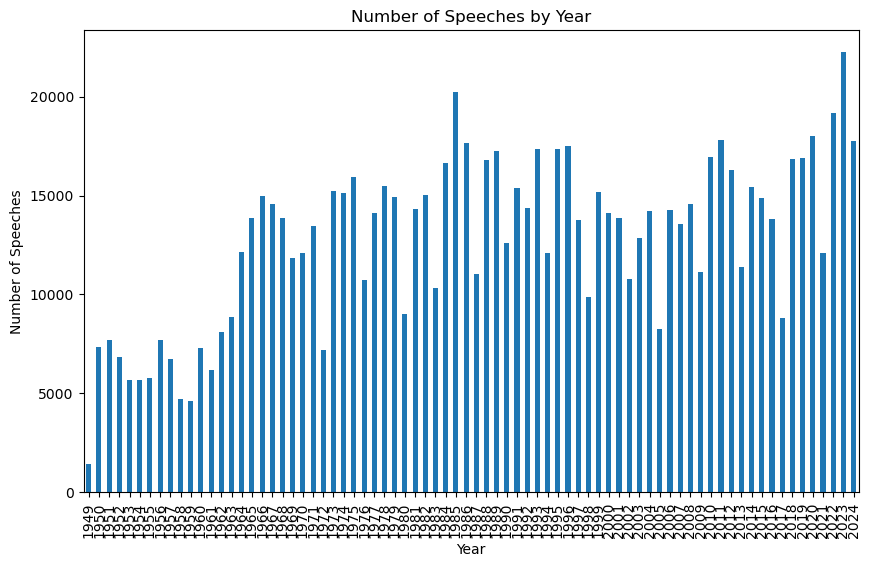

In [47]:
# show bar chart wit amount of rows per year
content_df['date'] = pd.to_datetime(content_df['date'])
content_df['year'] = content_df['date'].dt.year
content_df['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,6))
plt.title('Number of Speeches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.show()

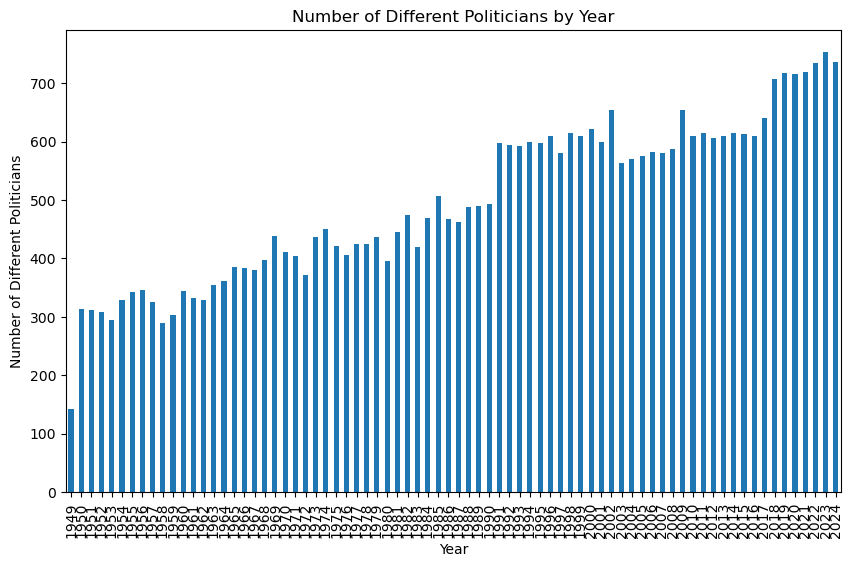

In [48]:
# show bar chart with number of different politicians per year
content_df.groupby('year')['politician_id'].nunique().plot(kind='bar', figsize=(10,6))
plt.title('Number of Different Politicians by Year')
plt.xlabel('Year')
plt.ylabel('Number of Different Politicians')
plt.show()


In [49]:
# show distribution of position long in electoral period 20 in table
content_df[content_df['electoral_term'] == 20]['position_long'].value_counts()


Vizepräsidentin                                                                                                17807
Vizepräsident                                                                                                   4734
Präsidentin                                                                                                     4445
Bundesminister der Finanzen                                                                                      597
Bundesministerin für Familie, Senioren, Frauen und Jugend                                                        243
                                                                                                               ...  
Parl. Staatssekretär bei der Bundesministerin der Verteidigung                                                     1
Parl. Staatssekretär bei der Bundesministerin                                     des Innern und für Heimat        1
Ministerpräsidentin (Saarland)                                  

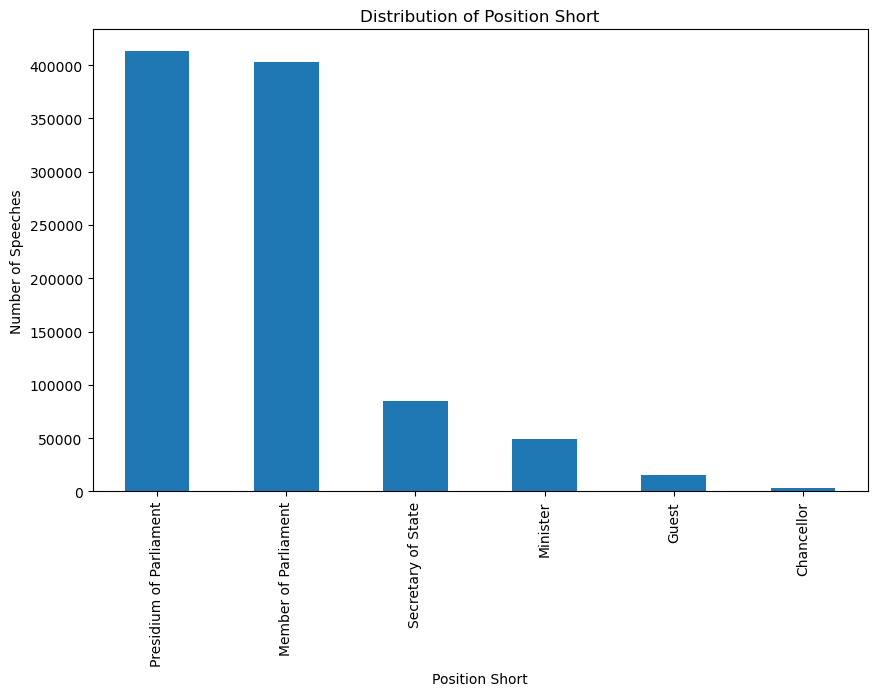

In [50]:
# show distribution of position short in bar chart
content_df['position_short'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Position Short')
plt.xlabel('Position Short')
plt.ylabel('Number of Speeches')
plt.show()

In [51]:
# minnimum and maximum date
print(content_df['date'].min())
print(content_df['date'].max())

1949-09-11 00:00:00
2024-11-15 00:00:00


### 2.9 Safe DFs for easier computation later

In [52]:
# safe content
'''content_df.to_pickle('content_df.pkl')
politicians.to_pickle('politicians_df.pkl')
contributions_df.to_pickle('contributions_df.pkl')'''

"content_df.to_pickle('content_df.pkl')\npoliticians.to_pickle('politicians_df.pkl')\ncontributions_df.to_pickle('contributions_df.pkl')"

## 3. Feature enriching

In [53]:
# Load from pickle
'''content_df = pd.read_pickle('content_df.pkl')
politicians_df = pd.read_pickle('politicians_df.pkl')
contributions_df = pd.read_pickle('contributions_df.pkl')'''
content_df_features = content_df.copy()
politicians_df = politicians.copy()

In [54]:
#speech length
content_df_features['speech_length'] = content_df_features['speech_content'].str.len()

# age of politician (merge with politician df first)
content_df_features = pd.merge(content_df_features, politicians_df[['ui','electoral_term', 'birth_date']], how='left',
                    left_on=['politician_id','electoral_term'], right_on=['ui', 'electoral_term'])
content_df_features.drop(columns=['ui'], inplace=True)
content_df_features['birth_date'] = pd.to_datetime(content_df_features['birth_date'], errors='coerce')
content_df_features['date'] = pd.to_datetime(content_df_features['date'], errors='coerce')
content_df_features['age'] = (content_df_features['date'] - content_df_features['birth_date']).dt.days // 365
content_df_features.drop(columns=['birth_date'], inplace=True)

# genger (merge with politician df first)
content_df_features = pd.merge(content_df_features, politicians_df[['ui','electoral_term', 'gender']], how='left',
                    left_on=['politician_id', 'electoral_term'], right_on=['ui','electoral_term'])
content_df_features.drop(columns=['ui'], inplace=True)


# politicians tenure (time difference of first speech)
content_df_features['first_speech'] = content_df_features.groupby('politician_id')['date'].transform('min')
content_df_features['tenure'] = (content_df_features['date'] - content_df_features['first_speech']).dt.days/365
content_df_features.drop(columns=['first_speech'], inplace=True)

content_df_features.head()

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.0
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.0
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.0
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.0
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.0


In [56]:
content_df_features

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.000000
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.000000
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.000000
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.000000
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969852,1094071,20,201,thomas,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,lutze,7,Member of Parliament,None,11004103,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Frau Präsidentin! Sehr geehrte Kolleginnen und...,2024-11-15,DIE LINKE.,2024,3476,55.0,männlich,14.734247
969853,1094072,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,"Kollege Lutze, das Geschenk nehme ich gerne an...",2024-11-15,NaN,2024,172,56.0,weiblich,14.830137
969854,1094073,20,201,wilfried,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,oellers,5,Member of Parliament,None,11004365,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Sehr geehrte Frau Präsidentin! Liebe Kolleginn...,2024-11-15,CDU/CSU,2024,4699,49.0,männlich,10.690411
969855,1094074,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,Zusatzpunkt 11,Aktuelle Stunde auf Verlangen der Fraktion der...,Letzter Redner in dieser Aktuellen Stunde für ...,2024-11-15,NaN,2024,79,56.0,weiblich,14.830137


In [60]:
# left merge topics raw on id
content_df_features_topic = pd.merge(content_df_features, topics_raw[['id', 'topic']], how='left',
                    left_on='id', right_on='id')

# Replace specific strings in the 'topic' column
content_df_features_topic['topic'] = content_df_features_topic['topic'].str.replace("Bürger:innenrechte", "BürgerInnenrechte")

# Split 'topic' into 'main_category' and 'sub_category'
content_df_features_topic[['main_category', 'sub_category']] = content_df_features_topic['topic'].str.split(':', n=1, expand=True)

# Step 2: Normalize Unicode and Strings in 'main_category'
# Define a function to normalize Unicode characters
def normalize_unicode(text):
    if pd.isna(text):  # Skip NaN values
        return text
    return unicodedata.normalize('NFC', text)  # Convert to composed form

# Apply Unicode normalization and string cleaning
content_df_features_topic['main_category'] = (
    content_df_features_topic['main_category']
    .apply(normalize_unicode)  # Normalize Unicode
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space
)

# Step 3: Apply Category Mapping
# Define category mapping with regex
category_mapping = {
    r'^no topic.*': 'no topic',
    r'^öffentliche verwaltun.*': 'öffentliche verwaltung',
    r'^recht\s*&\s*kriminalitä.*': 'recht & kriminalität',
    r'^verteidigungspolitik.*': 'verteidigungspolitik',
    r'^sozialpolitik.*': 'sozialpolitik',
    r'^gesundheitswesen.*': 'gesundheitswesen',
    r'^arbei.*': 'arbeit',
    r'^energie.*': 'energie',
    r'^technologie.*': 'technologie',
    r'^umwelt.*': 'umwelt',
    r'^bürgerinnenrechte.*': 'bürgerinnenrechte',
    r'^transport.*': 'transport',
    r'^bildung.*': 'bildung',
    r'^wohnungswesen.*': 'wohnungswesen',
    r'^landwirtschaft.*': 'landwirtschaft',
    r'^volkswirtschaft.*': 'volkswirtschaft',
    r'^außenhandel.*': 'außenhandel',
    r'^sport.*': 'sport',
    r'^binnenhandel.*': 'binnenhandel',
    r'^wiedervereinigung.*': 'wiedervereinigung',
}

# Apply regex-based mapping to standardize categories
content_df_features_topic['main_category'] = content_df_features_topic['main_category'].replace(category_mapping, regex=True)

# Step 4: Verify and Debug
# Check unique categories after cleaning
unique_categories = content_df_features_topic['main_category'].unique()
print("Unique categories after cleaning:", unique_categories)

# Translate categories into English
translations = {
    'arbeit': 'Work',
    'recht & kriminalität': 'Law & Crime',
    'bürgerinnenrechte': 'Civil Rights',
    'außenpolitik': 'Foreign Policy',
    'öffentliche verwaltung': 'Public Administration',
    'verteidigungspolitik': 'Defense Policy',
    'sozialpolitik': 'Social Policy',
    'wohnungswesen': 'Housing',
    'energie': 'Energy',
    'umwelt': 'Environment',
    'landwirtschaft': 'Agriculture',
    'transport': 'Transport',
    'gesundheitswesen': 'Healthcare',
    'bildung': 'Education',
    'volkswirtschaft': 'Economy',
    'binnenhandel': 'Domestic Trade',
    'technologie': 'Technology',
    'wiedervereinigung': 'Reunification',
    'außenhandel': 'Foreign Trade',
    'sport': 'Sports',
}

# Replace German categories with English translations
content_df_features_topic['main_category'] = content_df_features_topic['main_category'].replace(translations)

category_counts = content_df_features_topic['main_category'].value_counts()
print("Category counts after cleaning:")
print(category_counts)

# calculate percentage of no topics
no_topic_count = category_counts['no topic']
total_count = category_counts.sum()
percentage_no_topic = no_topic_count / total_count * 100

# Display the percentage of speeches with no topic
print(f"Percentage of speeches with no topic: {percentage_no_topic:.2f}%")

content_df_features_topic.head()

Unique categories after cleaning: [nan 'arbeit' 'außenpolitik' 'no topic' 'sozialpolitik'
 'öffentliche verwaltung' 'gesundheitswesen' 'volkswirtschaft'
 'binnenhandel' 'außenhandel' 'bildung' 'umwelt' 'landwirtschaft'
 'energie' 'verteidigungspolitik' 'bürgerinnenrechte'
 'recht & kriminalität' 'wohnungswesen' 'sport' 'transport' 'technologie'
 'wiedervereinigung']
Category counts after cleaning:
no topic                 120146
Work                      17367
Civil Rights              10155
Defense Policy             9645
Law & Crime                9248
Domestic Trade             8483
Social Policy              7741
Foreign Policy             6629
Energy                     5890
Healthcare                 5742
Environment                5326
Technology                 4693
Education                  4528
Transport                  3733
Public Administration      3509
Agriculture                3499
Housing                    3009
Economy                    2278
Foreign Trade          

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.0,NaN,NaN,NaN
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,...,1949-09-11,NaN,1949,45,NaN,NaN,0.0,NaN,NaN,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.0,NaN,NaN,NaN
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,...,1949-09-11,NaN,1949,24,NaN,NaN,0.0,NaN,NaN,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,...,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.0,NaN,NaN,NaN


In [61]:
# to pickle
#content_df_features.to_pickle('content_df_features.pkl')
#len(content_df_features)
#content_df_features.to_csv('content_df_features.csv')

content_df_features_topic.to_pickle('content_df_features_topic.pkl')
len(content_df_features_topic)

969857

## 4. Analysis of Electoral Terms

### 4.1 Development of Debates per Electoral Term

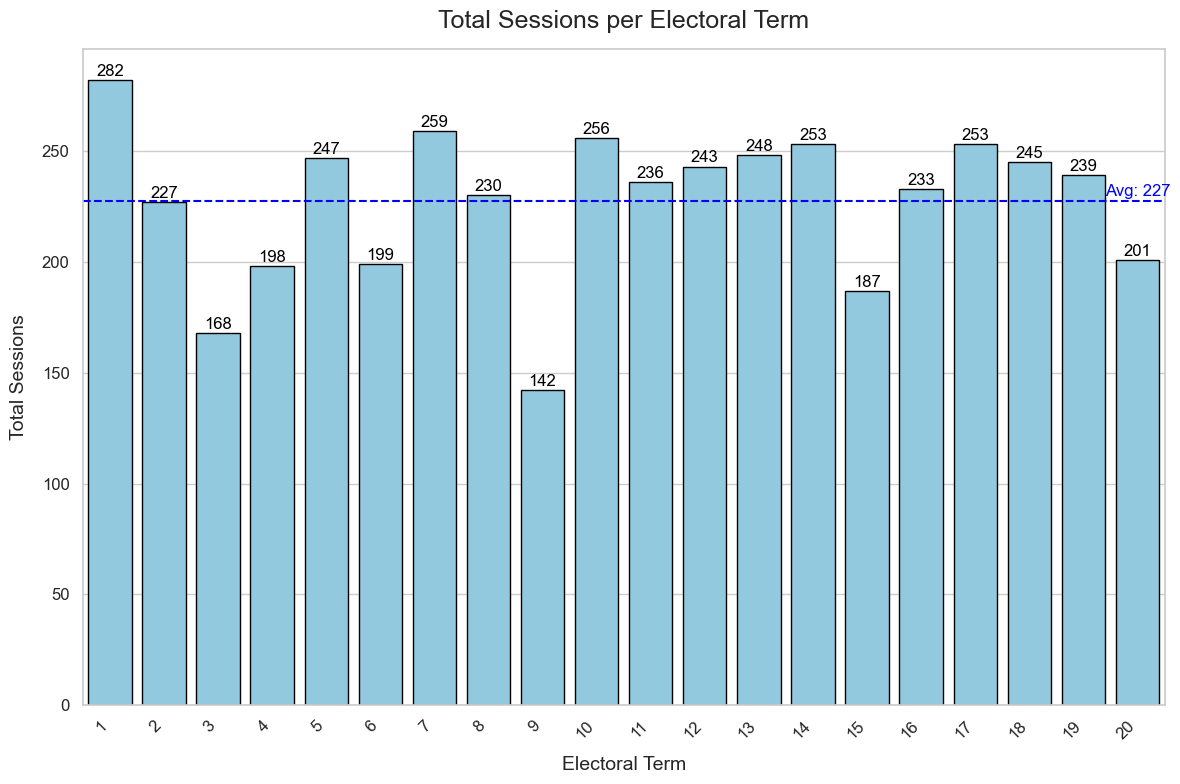

In [62]:
# Group by electoral term and find the maximum session
max_sessions = content_df_features.groupby('electoral_term')['session'].max().reset_index()

# Calculate the average session count across all electoral terms
average_session_count = max_sessions['session'].mean()

# Set up the Seaborn style
sns.set(style="whitegrid")

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='electoral_term', y='session', data=max_sessions, ax=ax, color='skyblue', edgecolor='black')

# Styling and labels
plt.title('Total Sessions per Electoral Term', fontsize=18, pad=15)
plt.xlabel('Electoral Term', fontsize=14, labelpad=10)
plt.ylabel('Total Sessions', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Display session count on top of each bar
for i, value in enumerate(max_sessions['session']):
    ax.text(i, value + 0.5, f'{value:.0f}', ha='center', va='bottom', fontsize=12, color='black')

# Draw a horizontal line for the overall average
ax.axhline(average_session_count, color='blue', linestyle='--', linewidth=1.5)
ax.text(len(max_sessions) - 1, average_session_count + 1, f'Avg: {average_session_count:.0f}', color='blue', ha='center', va='bottom', fontsize=12)

# Save plot as PNG with high resolution
plt.tight_layout()
fig.savefig('max_sessions_per_electoral_term.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Speaker per Electoral Term

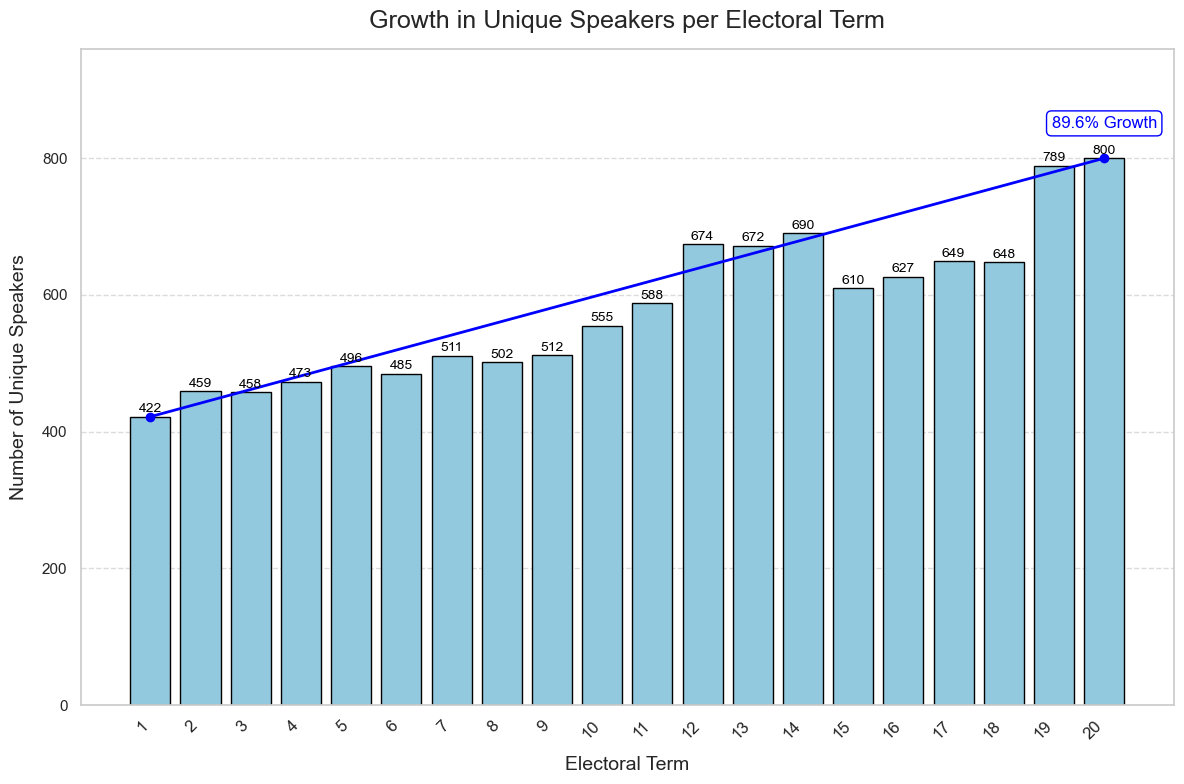

In [63]:
# Group by electoral term and count unique speakers
unique_speakers = content_df_features.groupby('electoral_term')['politician_id'].nunique().reset_index()

# Calculate the average number of unique speakers
average_unique_speakers = unique_speakers['politician_id'].mean()

# Calculate the percentage growth of unique speakers
start_value = unique_speakers['politician_id'].iloc[0]  # Value for the first electoral term
end_value = unique_speakers['politician_id'].iloc[-1]  # Value for the last electoral term
total_growth_percentage = ((end_value - start_value) / start_value) * 100

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot setup with bars and a straight line for the growth trend
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for unique speakers
sns.barplot(x='electoral_term', y='politician_id', data=unique_speakers, ax=ax, color='skyblue', edgecolor='black')

# Styling and labels for the bar plot
ax.set_title('Growth in Unique Speakers per Electoral Term', fontsize=18, pad=15)
ax.set_xlabel('Electoral Term', fontsize=14, labelpad=10)
ax.set_ylabel('Number of Unique Speakers', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Plot the straight growth line from term 1 to term 20
ax.plot([0, len(unique_speakers) - 1], [start_value, end_value], color='blue', linestyle='-', linewidth=2, marker='o')

# Set y-axis limit for clear visibility
ax.set_ylim(0, max(unique_speakers['politician_id'].max() * 1.2, end_value * 1.2))

# Add a final label indicating the total growth percentage at the end of the line
# Add the growth percentage label above or slightly to the side of the blue line
ax.text(
    len(unique_speakers) - 1,  # x-coordinate: last electoral term
    end_value + (end_value * 0.05),  # y-coordinate: slightly above the last bar
    f'{total_growth_percentage:.1f}% Growth',  # Text label
    color='blue',
    ha='center',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3')  # Optional: add a background box
)
# Display the number of unique speakers on top of each bar
for i, value in enumerate(unique_speakers['politician_id']):
    ax.text(i, value + 2, f'{value:.0f}', ha='center', va='bottom', fontsize=10, color='black')

# Customize gridlines for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot as PNG with high resolution
plt.tight_layout()
fig.savefig('unique_speakers_per_electoral_term_with_growth_trend.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


### 4.3 Time spoken per electoral term

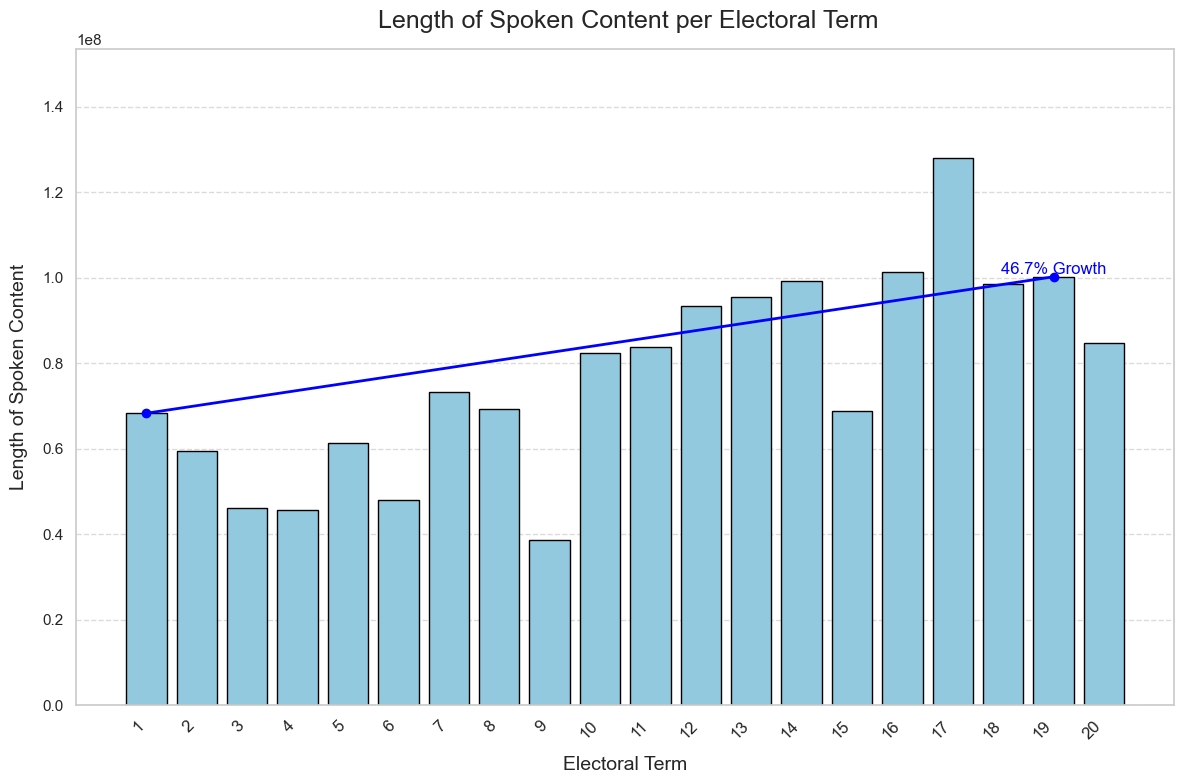

In [64]:
# Calculate the total spoken time per electoral term
time_spoken = content_df_features.groupby('electoral_term')['speech_length'].sum().reset_index()

# Define start and end values for the growth line from term 1 to term 19
start_value = time_spoken['speech_length'].iloc[0]
end_value = time_spoken['speech_length'].iloc[18]  # 19th term
total_growth_percentage = ((end_value - start_value) / start_value) * 100

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot setup with bars and a straight line for the growth trend
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for total spoken time
sns.barplot(x='electoral_term', y='speech_length', data=time_spoken, ax=ax, color='skyblue', edgecolor='black')

# Styling and labels for the bar plot
ax.set_title(' Length of Spoken Content per Electoral Term', fontsize=18, pad=15)
ax.set_xlabel('Electoral Term', fontsize=14, labelpad=10)
ax.set_ylabel('Length of Spoken Content', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Plot the straight growth line from term 1 to term 19 only
ax.plot([0, 18], [start_value, end_value], color='blue', linestyle='-', linewidth=2, marker='o')

# Set y-axis limit for clear visibility
ax.set_ylim(0, max(time_spoken['speech_length'].max() * 1.2, end_value * 1.2))

# Add a final label indicating the total growth percentage at the end of the line
ax.text(18, end_value, f'{total_growth_percentage:.1f}% Growth', color='blue', ha='center', va='bottom', fontsize=12)

# Customize gridlines for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot as PNG with high resolution
plt.tight_layout()
fig.savefig('time_spoken_per_electoral_term_with_growth_trend.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Parties per Electoral Term

#### 4.3.1 Speakers per party

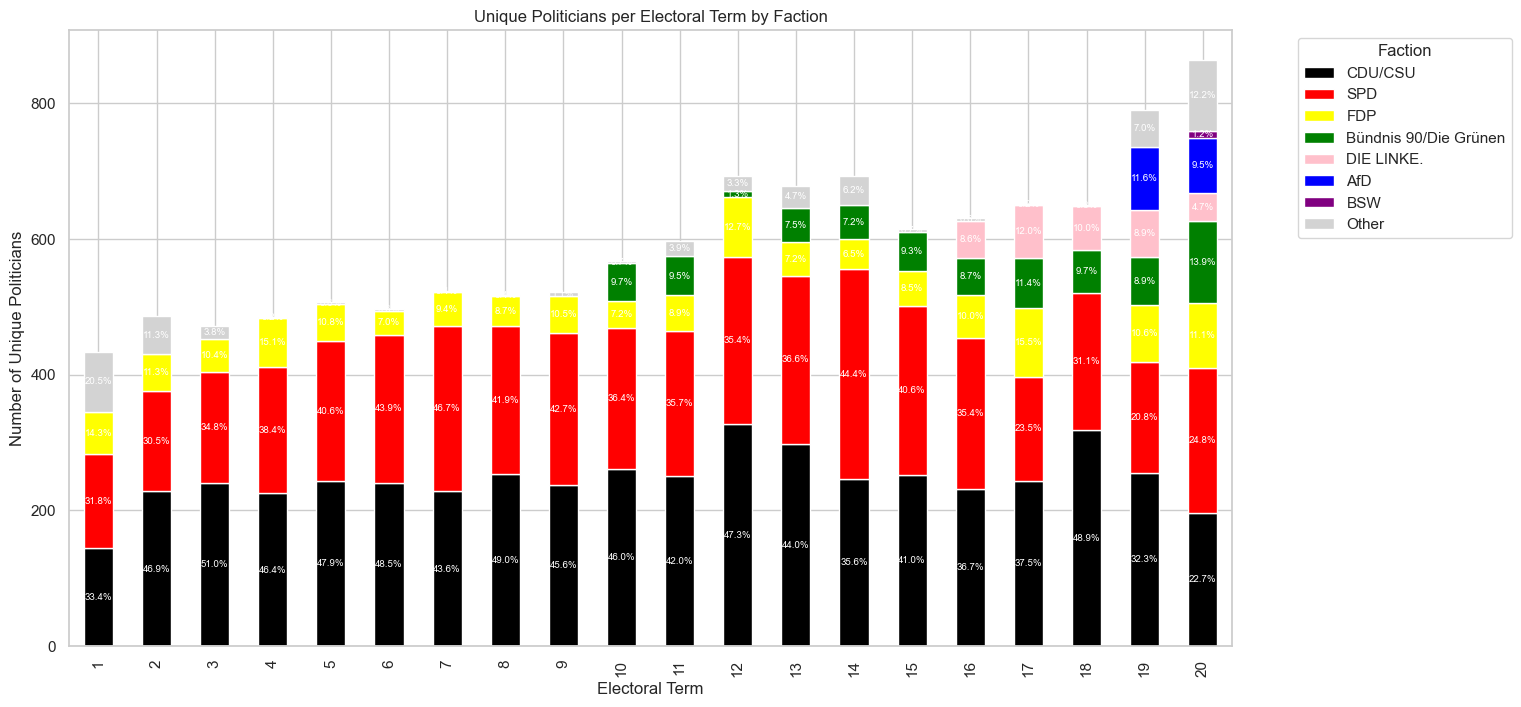

In [65]:
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'pink',
    'AfD': 'blue',
    'BSW': 'purple',
}
# create a new dataframe, mark all factions that are not in color map as other
content_df_factions = content_df_features.copy()
content_df_factions['faction'] = content_df_factions['faction'].apply(lambda x: x if x in color_map else 'Other')

# Create a pivot table to count unique politician IDs per electoral term and faction
unique_politicians_per_faction = content_df_factions.pivot_table(index='electoral_term', columns='faction', values='politician_id', aggfunc=pd.Series.nunique, fill_value=0)

# sort by largest faction
unique_politicians_per_faction = unique_politicians_per_faction[unique_politicians_per_faction.sum().sort_values(ascending=False).index]

# always keep other at the bottom
unique_politicians_per_faction = unique_politicians_per_faction[[x for x in unique_politicians_per_faction.columns if x != 'Other'] + ['Other']]


# Plot the stacked bar chart with the individual color map, leaving all others in light grey

fig, ax = plt.subplots(figsize=(15, 8))
unique_politicians_per_faction.plot(
    kind='bar',
    stacked=True,
    color=[color_map.get(x, 'lightgrey') for x in unique_politicians_per_faction.columns],
    ax=ax
)
plt.title('Unique Politicians per Electoral Term by Faction')
plt.xlabel('Electoral Term')
plt.ylabel('Number of Unique Politicians')
plt.legend(title='Faction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding percentages to each bar segment
for i, term in enumerate(unique_politicians_per_faction.index):
    total = unique_politicians_per_faction.loc[term].sum()
    for j, (faction, count) in enumerate(unique_politicians_per_faction.loc[term].items()):
        if count > 0:
            ax.text(i, unique_politicians_per_faction.loc[term, :faction].sum() - count / 2,
                    f"{count / total:.1%}", ha='center', va='center', color="white", fontsize=7)

plt.show()

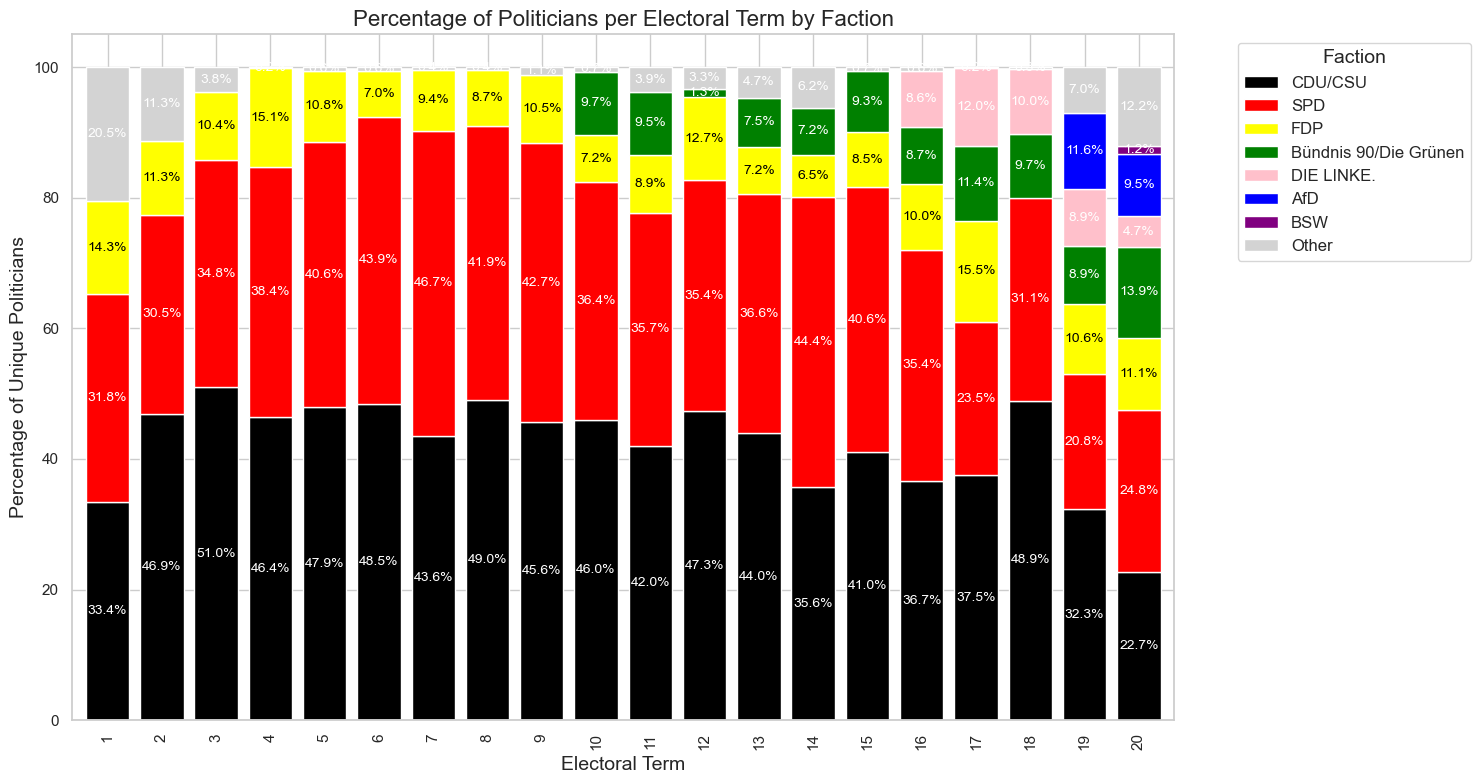

In [66]:
color_map = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'DIE LINKE.': 'pink',
    'AfD': 'blue',
    'BSW':'purple'
}

# Create a new dataframe, mark all factions that are not in the color map as 'Other'
content_df_factions = content_df_features.copy()
content_df_factions['faction'] = content_df_factions['faction'].apply(lambda x: x if x in color_map else 'Other')

# Create a pivot table to count unique politician IDs per electoral term and faction
unique_politicians_per_faction = content_df_factions.pivot_table(
    index='electoral_term', 
    columns='faction', 
    values='politician_id', 
    aggfunc=pd.Series.nunique, 
    fill_value=0
)

# Sort factions by the total number across all terms
unique_politicians_per_faction = unique_politicians_per_faction[unique_politicians_per_faction.sum().sort_values(ascending=False).index]

# Always keep 'Other' at the bottom
unique_politicians_per_faction = unique_politicians_per_faction[
    [x for x in unique_politicians_per_faction.columns if x != 'Other'] + ['Other']
]

# Normalize each row to sum to 100% (convert counts to percentages)
unique_politicians_percent = unique_politicians_per_faction.div(unique_politicians_per_faction.sum(axis=1), axis=0) * 100


# Plot the stacked bar chart with updated font color settings
fig, ax = plt.subplots(figsize=(15, 8))
unique_politicians_percent.plot(
    kind='bar',
    stacked=True,
    color=[color_map.get(x, 'lightgrey') for x in unique_politicians_percent.columns],
    ax=ax,
    width=0.8 
)

# Add title and labels with increased font size
plt.title('Percentage of Politicians per Electoral Term by Faction', fontsize=16)
plt.xlabel('Electoral Term', fontsize=14)
plt.ylabel('Percentage of Unique Politicians', fontsize=14)
plt.legend(title='Faction', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

# Add percentages to each bar segment with font color adjustments
for i, term in enumerate(unique_politicians_percent.index):
    cumulative = 0
    for faction, percentage in unique_politicians_percent.loc[term].items():
        if percentage > 0:
            # Set label color: black for FDP, white for others
            text_color = 'black' if faction == 'FDP' else 'white'
            ax.text(
                i, cumulative + percentage / 2,  # Place text in the middle of the bar segment
                f"{percentage:.1f}%", 
                ha='center', va='center', fontsize=10, color=text_color
            )
            cumulative += percentage

# Adjust layout and display the chart
plt.tight_layout()
plt.savefig('percentage_politicians_per_electoral_term_by_faction.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


#### 4.3.2 Speaking time per party

In [67]:
content_df_features.position_short.unique()

# of the content df, filter out all 'Presidium of Parliament' 
content_without_moderation = content_df_features[content_df_features.position_short != 'Presidium of Parliament']

# Map factions to 'Other' if not in color_map
content_without_moderation['faction'] = content_without_moderation['faction'].apply(lambda x: x if x in color_map else 'Other')

# Step 2: Group by electoral term and faction, then sum speech length
speaking_per_party = content_without_moderation.groupby(['electoral_term', 'faction'])['speech_length'].sum().unstack(fill_value=0)

In [68]:
speaking_per_party.tail()

faction,AfD,BSW,Bündnis 90/Die Grünen,CDU/CSU,DIE LINKE.,FDP,Other,SPD
electoral_term,,,,,,,,
16,0,0,11957143,26592534,11334134,12776497,476284,27936617
17,0,0,15035497,40991791,14925675,19412152,287619,25552490
18,0,0,14216501,36398263,12791924,0,251241,24694290
19,12665675,0,10149963,31423150,9490919,10601678,1957300,20086424
20,8973629,261785,13119371,19185416,4722958,11054851,5016089,20255828


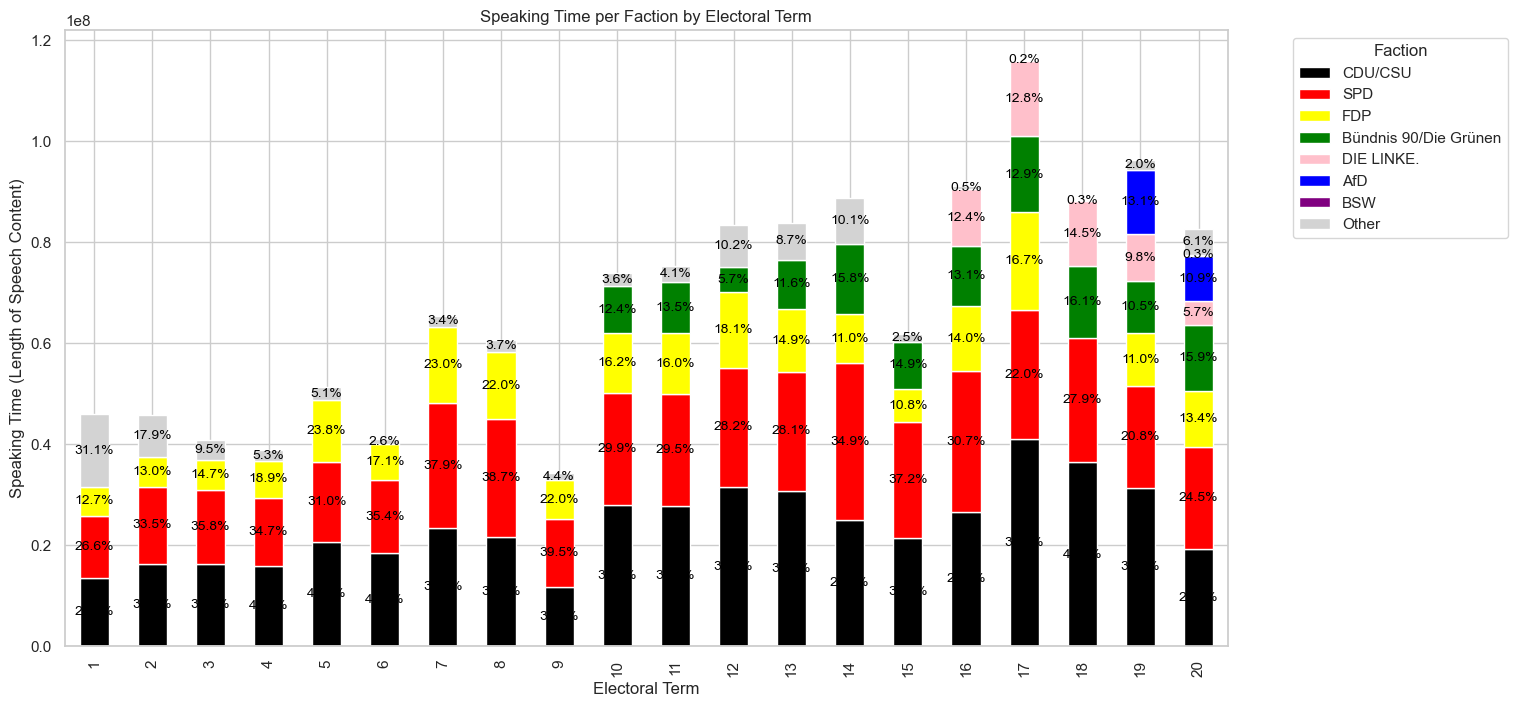

In [69]:
speaking_per_party = speaking_per_party[speaking_per_party.sum().sort_values(ascending=False).index]
if 'Other' in speaking_per_party.columns:
    cols = [col for col in speaking_per_party.columns if col != 'Other'] + ['Other']
    speaking_per_party = speaking_per_party[cols]

# Step 4: Plot stacked bar chart with color mapping
fig, ax = plt.subplots(figsize=(15, 8))
speaking_per_party.plot(
    kind='bar',
    stacked=True,
    color=[color_map.get(faction, 'lightgrey') for faction in speaking_per_party.columns],
    ax=ax,
    title='Speaking Time per Faction by Electoral Term'
)

# Labels and legend
plt.xlabel('Electoral Term')
plt.ylabel('Speaking Time (Length of Speech Content)')
plt.legend(title='Faction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 5: Add percentage labels
for i, term in enumerate(speaking_per_party.index):
    total = speaking_per_party.loc[term].sum()
    cumulative_height = 0
    for faction, value in speaking_per_party.loc[term].items():
        if value > 0:
            cumulative_height += value
            ax.text(
                i, cumulative_height - value / 2,
                f"{value / total:.1%}", ha='center', va='center', color="black", fontsize=10
            )

plt.show()

#### 4.3.3 All-In-One Party comparison

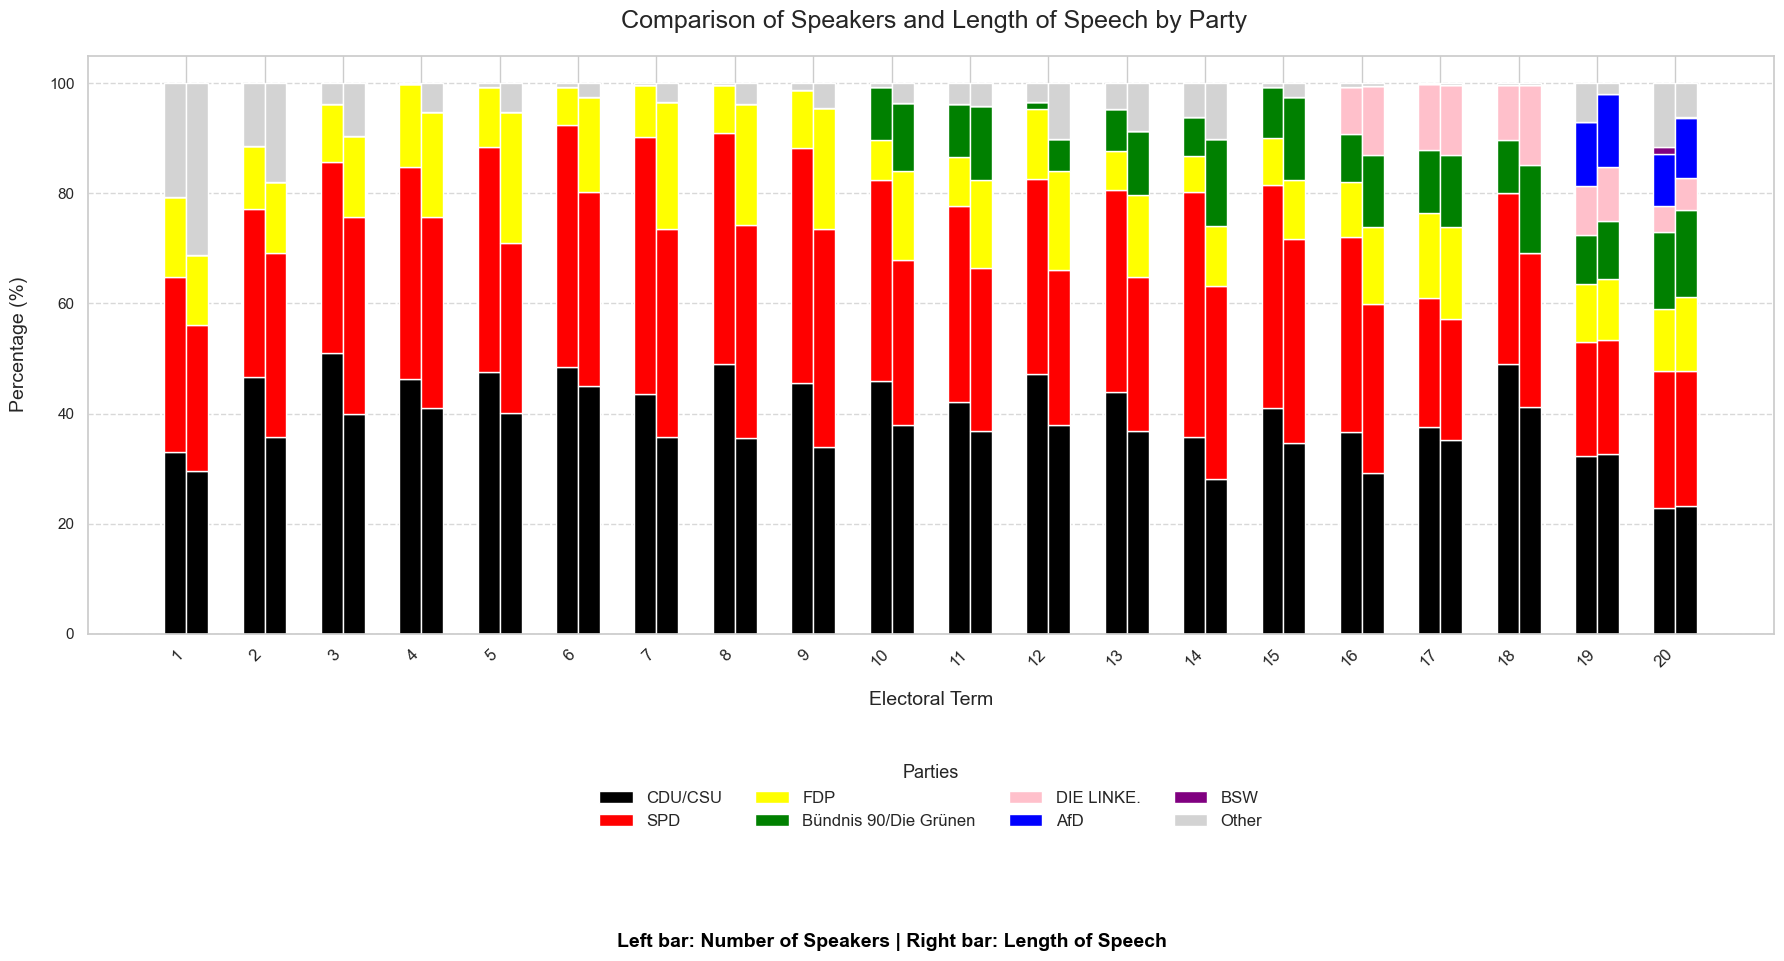

In [70]:
content_without_moderation = content_df_features[content_df_features.position_short != 'Presidium of Parliament']
content_without_moderation['faction'] = content_without_moderation['faction'].apply(lambda x: x if x in color_map else 'Other')

# Prepare Data for Speaking Time
speaking_per_party = content_without_moderation.groupby(['electoral_term', 'faction'])['speech_length'].sum().unstack(fill_value=0)
speaking_per_party = speaking_per_party[speaking_per_party.sum().sort_values(ascending=False).index]
if 'Other' in speaking_per_party.columns:
    cols = [col for col in speaking_per_party.columns if col != 'Other'] + ['Other']
    speaking_per_party = speaking_per_party[cols]

# Prepare Data for Number of Speakers
unique_speakers = content_without_moderation.groupby(['electoral_term', 'faction'])['politician_id'].nunique().unstack(fill_value=0)
unique_speakers = unique_speakers[speaking_per_party.columns]  # Align columns with speaking time

# Calculate percentages for both metrics
speaking_per_party_percent = speaking_per_party.div(speaking_per_party.sum(axis=1), axis=0) * 100
unique_speakers_percent = unique_speakers.div(unique_speakers.sum(axis=1), axis=0) * 100

# Plot setup
fig, ax = plt.subplots(figsize=(18, 10))
width = 0.35  # Width of each bar set
gap_between_bars = 0.25  # Slightly increase gap for better clarity

# Positions for the bars with additional spacing between electoral terms
electoral_terms = np.arange(len(speaking_per_party.index)) * (1 + gap_between_bars)

# Add subtle gridlines for better readability
ax.grid(axis='y', linestyle='--', color='gray', alpha=0.3)

# Plot Number of Speakers
bottom_speakers = np.zeros(len(electoral_terms))
for faction in unique_speakers_percent.columns:
    ax.bar(electoral_terms - width / 2, unique_speakers_percent[faction], width=width, 
           label=faction, color=color_map.get(faction, 'lightgrey'), bottom=bottom_speakers)
    bottom_speakers += unique_speakers_percent[faction]

# Plot Speaking Time
bottom_speaking_time = np.zeros(len(electoral_terms))
for faction in speaking_per_party_percent.columns:
    ax.bar(electoral_terms + width / 2, speaking_per_party_percent[faction], width=width, 
           color=color_map.get(faction, 'lightgrey'), bottom=bottom_speaking_time)
    bottom_speaking_time += speaking_per_party_percent[faction]

# Labels and Legend
ax.set_xticks(electoral_terms)
ax.set_xticklabels(speaking_per_party.index, rotation=45, ha='right', fontsize=12)
ax.set_xlabel('Electoral Term', fontsize=14, labelpad=15)
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=15)
ax.set_title(" Comparison of Speakers and Length of Speech by Party", fontsize=18, pad=20)


# Add a note below the chart to indicate bar meaning
plt.figtext(0.5, 0, "Left bar: Number of Speakers | Right bar: Length of Speech", ha='center', va='center', fontsize=14, color="black", weight='bold')

# Adjust the legend for cleaner appearance and place it at the bottom
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate legend entries
ax.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=12, title="Parties", title_fontsize=13, frameon=False)

# Save plot as PNG
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to fit legend at bottom and ensure y-axis visibility
fig.savefig('speaking_time.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

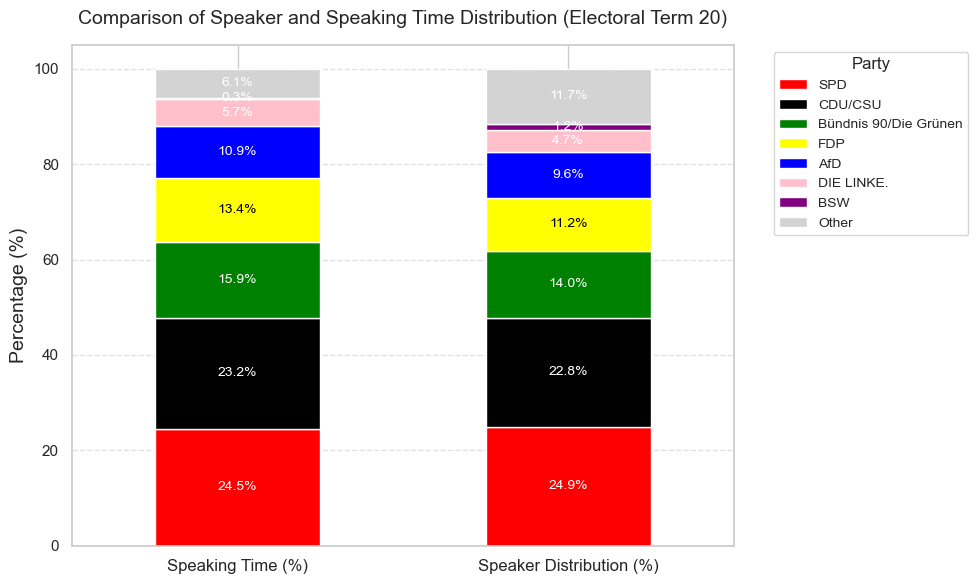

In [71]:
# Filter data for electoral term 20
term_20_data = content_without_moderation[content_without_moderation['electoral_term'] == 20]

# Calculate speaking time percentages for term 20
speaking_per_party = term_20_data.groupby(['faction'])['speech_length'].sum()
speaking_per_party_percent = speaking_per_party.div(speaking_per_party.sum()) * 100

# Calculate unique speakers percentages for term 20
unique_speakers = term_20_data.groupby(['faction'])['politician_id'].nunique()

unique_speakers_percent = unique_speakers.div(unique_speakers.sum()) * 100

# Align the columns with the desired faction order
faction_order = ['SPD', 'CDU/CSU', 'Bündnis 90/Die Grünen', 'FDP', 'AfD', 'DIE LINKE.', 'BSW', 'Other']
speaking_per_party_percent = speaking_per_party_percent.reindex(faction_order, fill_value=0)
unique_speakers_percent = unique_speakers_percent.reindex(faction_order, fill_value=0)

# Prepare data for stacked bars
stacked_data = pd.DataFrame({
    'Speaking Time (%)': speaking_per_party_percent,
    'Speaker Distribution (%)': unique_speakers_percent
}).T  # Transpose to make metrics the index and factions the columns

# Plot setup
# Plot stacked bars
fig, ax = plt.subplots(figsize=(10, 6))

stacked_data.plot(
    kind='bar',
    stacked=True,
    color=[color_map.get(faction, 'lightgrey') for faction in faction_order],
    ax=ax
)

# Add percentage labels to the segments with custom text colors
for i, metric in enumerate(stacked_data.index):  # Loop over the two bars
    cumulative = 0
    for faction in faction_order:
        percentage = stacked_data.loc[metric, faction]
        if percentage > 0:
            # Set label color: black for FDP, white for others
            text_color = 'black' if faction == 'FDP' else 'white'
            ax.text(
                i, cumulative + percentage / 2,  # Place text in the middle of the bar segment
                f"{percentage:.1f}%", 
                ha='center', va='center', fontsize=10, color=text_color
            )
            cumulative += percentage

# Customize the chart
ax.set_xticks(range(len(stacked_data.index)))
ax.set_xticklabels(stacked_data.index, rotation=0, fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_title('Comparison of Speaker and Speaking Time Distribution (Electoral Term 20)', fontsize=14, pad=15)

# Add legend
ax.legend(title='Party', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('stacked_speakers_vs_speaking_time_term_20_labels_adjusted.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

### 4.4 Evolution of Male and female speakers

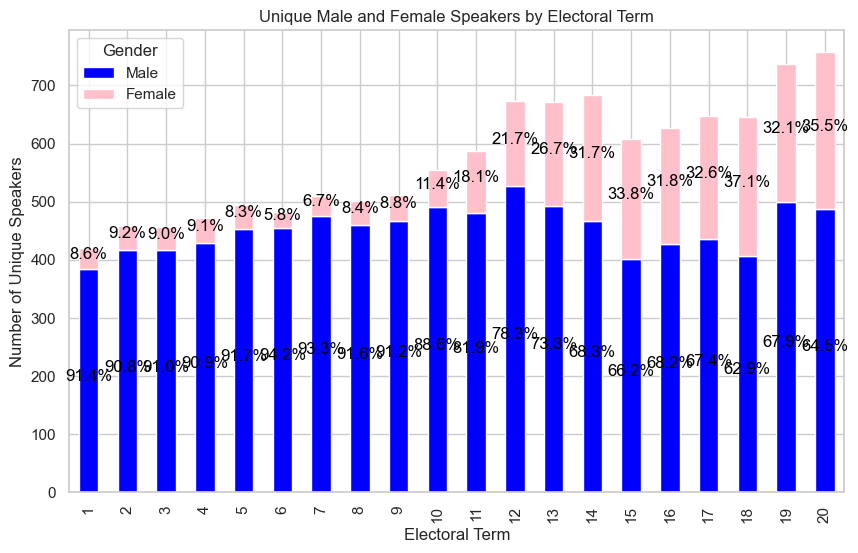

In [72]:
# match gender to content_df based on politicians id in politicians df

unique_speakers = content_df_features.groupby(['electoral_term', 'gender'])['politician_id'].nunique().unstack().fillna(0)

# Step 2: Calculate percentage of male and female speakers within each electoral term
unique_speakers_percent = unique_speakers.div(unique_speakers.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))
unique_speakers.plot(kind='bar', stacked=True, color=['blue', 'pink'], ax=ax)
plt.title('Unique Male and Female Speakers by Electoral Term')
plt.xlabel('Electoral Term')
plt.ylabel('Number of Unique Speakers')
plt.legend(['Male', 'Female'], title="Gender")

# Adding percentage labels for each gender within each electoral term
for i, term in enumerate(unique_speakers.index):
    male_count = unique_speakers.iloc[i, 0]
    female_count = unique_speakers.iloc[i, 1]
    male_percent = unique_speakers_percent.iloc[i, 0]
    female_percent = unique_speakers_percent.iloc[i, 1]
    
    # Place percentage labels at the center of each stacked section
    ax.text(i, male_count / 2, f'{male_percent:.1f}%', ha='center', color='black')
    ax.text(i, male_count + female_count / 2, f'{female_percent:.1f}%', ha='center', color='black')

plt.show()

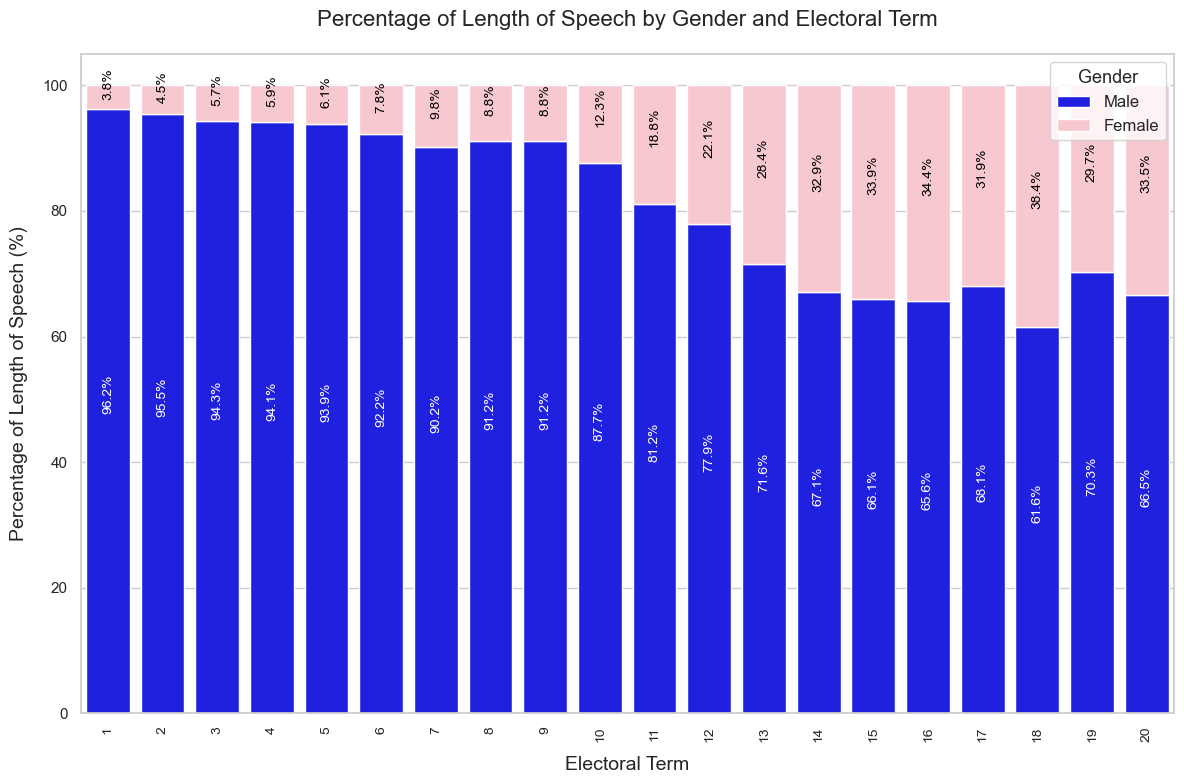

In [73]:
# Sample Data Preparation
speaking_time = content_df_features.groupby(['electoral_term', 'gender'])['speech_length'].sum().unstack().fillna(0)

# Calculate percentage of speaking time for each gender within each electoral term
speaking_time_percent = speaking_time.div(speaking_time.sum(axis=1), axis=0) * 100

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot setup with stacked bars in Seaborn
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Male and Female percentages as stacked bars
bottom_male = np.zeros(len(speaking_time_percent.index))
sns.barplot(x=speaking_time_percent.index, y=speaking_time_percent['männlich'], color='blue', ax=ax, label='Male', bottom=bottom_male)
bottom_male += speaking_time_percent['männlich']
sns.barplot(x=speaking_time_percent.index, y=speaking_time_percent['weiblich'], color='pink', ax=ax, label='Female', bottom=bottom_male)

# Styling and labels
ax.set_title('Percentage of Length of Speech by Gender and Electoral Term', fontsize=16, pad=20)
ax.set_xlabel('Electoral Term', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Length of Speech (%)', fontsize=14, labelpad=10)
plt.xticks(rotation=90, ha='center', fontsize=10)

# Add percentage labels for each gender within each electoral term
for i, term in enumerate(speaking_time_percent.index):
    male_time_percent = speaking_time_percent.loc[term, 'männlich']
    female_time_percent = speaking_time_percent.loc[term, 'weiblich']
    
    # Place percentage labels in the center of each stacked section
    ax.text(i, male_time_percent / 2, f'{male_time_percent:.1f}%', ha='center', color='white', fontsize=10, rotation=90)
    ax.text(i, male_time_percent + female_time_percent / 2, f'{female_time_percent:.1f}%', ha='center', color='black', fontsize=10, rotation=90)

# Legend
plt.legend(title="Gender", loc='upper right', fontsize=12, title_fontsize=13)

# Save plot as PNG with high resolution
plt.tight_layout()
plt.savefig("percentage_of_speaking_time_by_gender_seaborn.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Analysis of Electoral term 20

### 5.1 Age of speakers

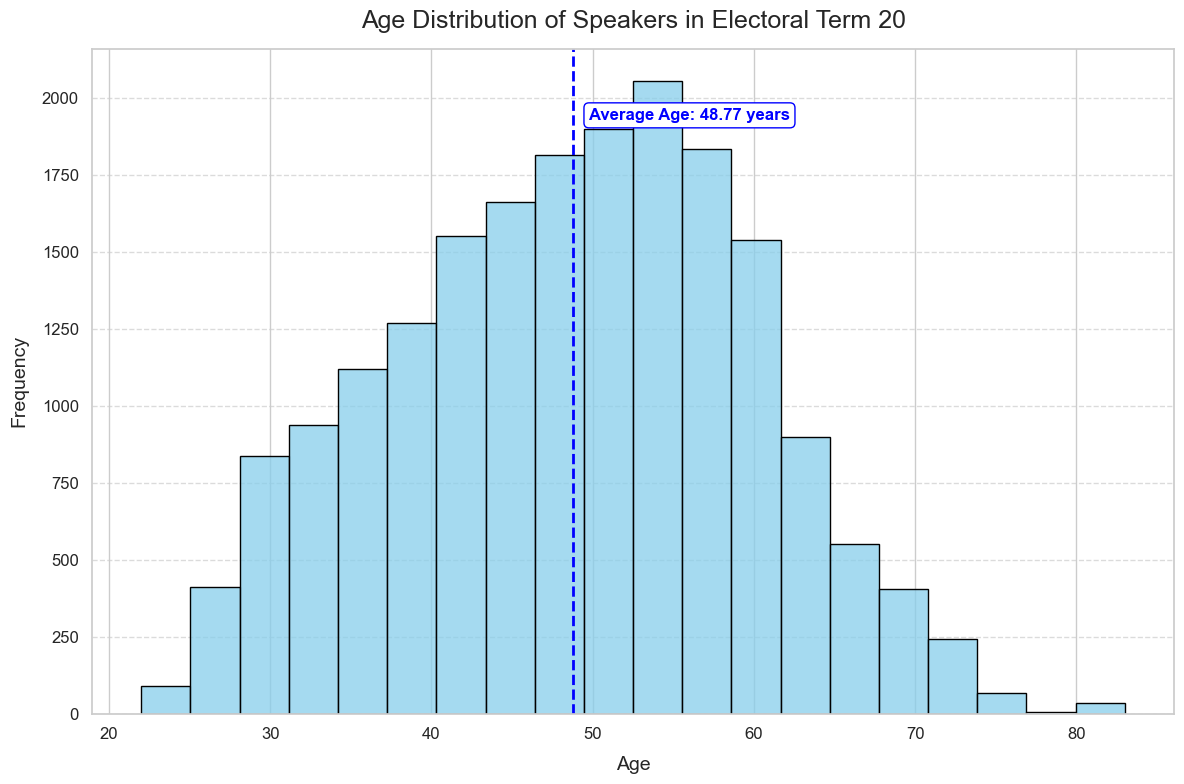

Average Age of Speakers in Electoral Term 20: 48.77 years
Youngest Speaker: emily vontz (22.0 years)
Oldest Speaker: alexander gauland (83.0 years)


In [74]:
# Filter data for electoral term 20 only and remove duplicate entries
content_term_20 = content_df_features[content_df_features['electoral_term'] == 20].copy()
content_term_20.drop_duplicates(subset=['politician_id','electoral_term', 'session'], keep='first', inplace=True)
content_term_20 = content_term_20.dropna(subset=['age'])  # Drop rows with missing age

# Calculate average age
average_age = content_term_20['age'].mean()

# Set up Seaborn style and plot the histogram
plt.figure(figsize=(12, 8))
sns.histplot(content_term_20['age'], bins=20, kde=False, color="skyblue", edgecolor='black')

# Add average age line
plt.axvline(average_age, color='blue', linestyle='--', linewidth=2)

# Annotate the average age on the plot
plt.text(average_age + 1, plt.gca().get_ylim()[1] * 0.9, f'Average Age: {average_age:.2f} years', color='blue', 
         fontsize=12, ha='left', va='center', fontweight='bold', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'))

# Title and axis labels
plt.title('Age Distribution of Speakers in Electoral Term 20', fontsize=18, pad=15)
plt.xlabel('Age', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot as PNG with high resolution
plt.tight_layout()
plt.savefig("age_distribution_electoral_term_20.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

# Print the average age in the console for reference
print(f'Average Age of Speakers in Electoral Term 20: {average_age:.2f} years')

# print the minimum and maximum age and the name of the youngest and oldest speaker
youngest_speaker = content_term_20.loc[content_term_20['age'].idxmin()]
oldest_speaker = content_term_20.loc[content_term_20['age'].idxmax()]

print(f'Youngest Speaker: {youngest_speaker["first_name"]} {youngest_speaker["last_name"]} ({youngest_speaker["age"]} years)')
print(f'Oldest Speaker: {oldest_speaker["first_name"]} {oldest_speaker["last_name"]} ({oldest_speaker["age"]} years)')


### 5.2 Tenure

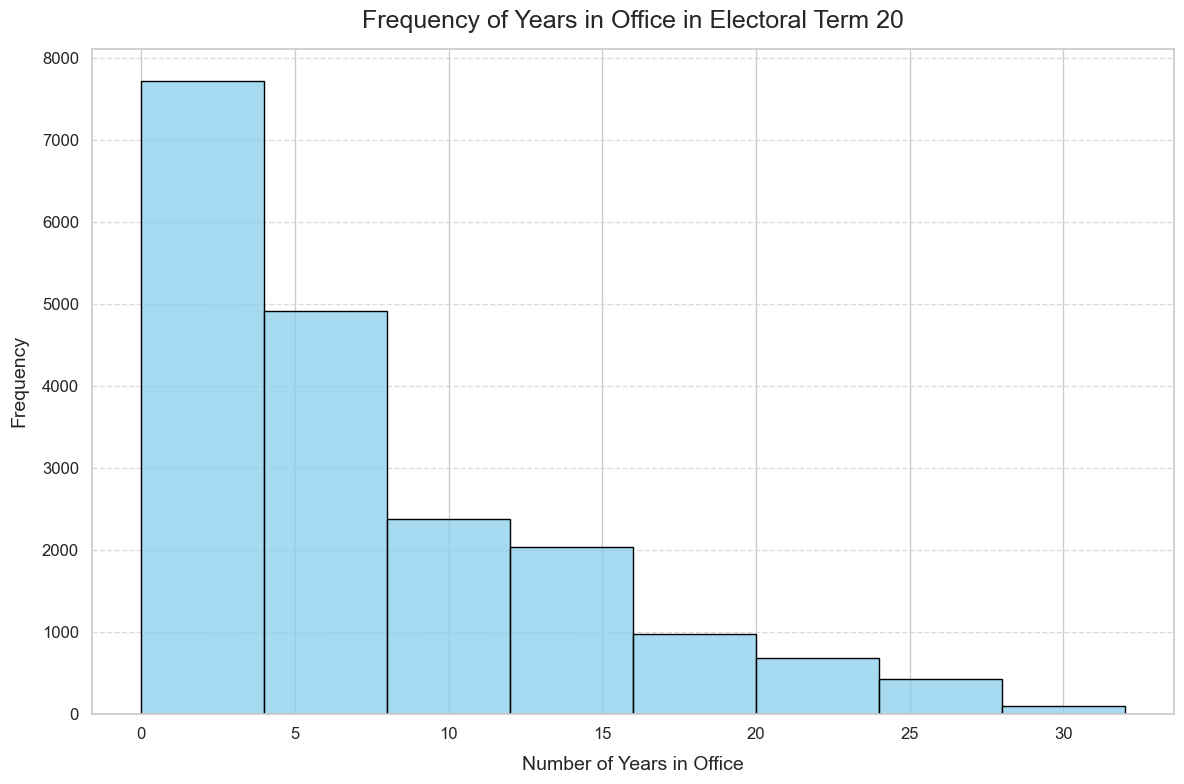

315


In [75]:
# Remove duplicates of date and politician_id, filter for electoral term 20
tenure_df_frequency = content_df_features.drop_duplicates(subset=['date', 'politician_id'])
tenure_df_frequency_20 = tenure_df_frequency[tenure_df_frequency['electoral_term'] == 20]

# Remove outliers (tenure greater than 30 years)
tenure_df_frequency_20 = tenure_df_frequency_20[tenure_df_frequency_20['tenure'] < 30]

# Set up Seaborn style and plot the histogram
plt.figure(figsize=(12, 8))
tenure_data = tenure_df_frequency_20['tenure']

# Determine the range of your data
min_tenure = tenure_data.min()
max_tenure = tenure_data.max()

# Generate bins from the minimum to maximum value with a step of 4 years
bins = np.arange(min_tenure, max_tenure + 4, 4)  # Adding 4 to include the max value in the range

# Plot using seaborn
sns.histplot(tenure_data, bins=bins, color="skyblue", edgecolor="black")

# Title and axis labels
plt.title('Frequency of Years in Office in Electoral Term 20', fontsize=18, pad=15)
plt.xlabel('Number of Years in Office', fontsize=14, labelpad=10)
plt.ylabel('Frequency', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save plot as PNG with high resolution
plt.tight_layout()
plt.savefig("frequency_of_years_in_office_electoral_term_20.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

# calculate and print amount where tenure is 0
print(tenure_df_frequency_20[tenure_df_frequency_20['tenure'] == 0].shape[0])




### 5.3 Speech length

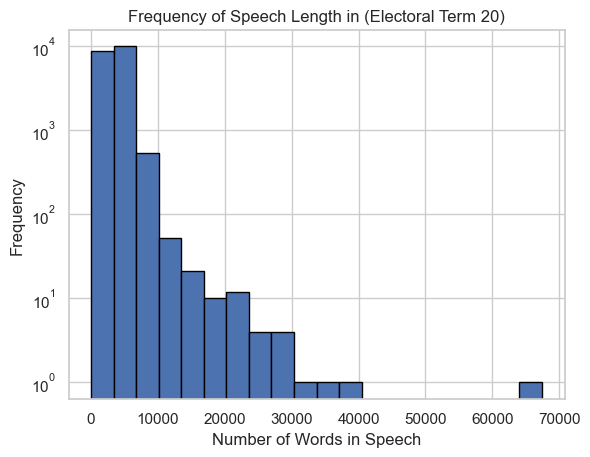

In [76]:
# frequency diagram with speech_length
tenure_df_frequency_20['speech_length'].plot(kind='hist', bins=20, edgecolor='black')
# log y axis
plt.yscale('log')

plt.xlabel('Number of Words in Speech')
plt.ylabel('Frequency')
plt.title('Frequency of Speech Length in (Electoral Term 20)')
plt.show()



### 5.4 Politicians Origin Analysis

In [77]:
cities_with_info = cities_with_info_raw.copy()

# for Column Stadt, remove everything after the comma, including the comma
cities_with_info['Stadt'] = cities_with_info['Stadt'].str.split(',').str[0]

# remove leading and trailing whitespaces
cities_with_info['Stadt'] = cities_with_info['Stadt'].str.strip()

# remove duplicates
cities_with_info = cities_with_info.drop_duplicates(subset=['Stadt'])
cities_with_info = cities_with_info.dropna(subset=['Stadt'])

# change land to int


# if column land larger than 11, "former GDR" other, former "BRD"
cities_with_info['Former Country'] = np.where(cities_with_info['Land'] > 11, 'former GDR', 'former BRD')

cities_with_info

def classify_city(population):
    if population < 5000:
        return "Small City"
    elif 5000 <= population < 20000:
        return "Small City"
    elif 20000 <= population < 100000:
        return "Medium City"
    else:
        return "Large City"

# Apply the classification function to the population column
cities_with_info['City Classification'] = cities_with_info['Bevölkerung3)'].apply(classify_city)

# Display the updated DataFrame with the new classification column
cities_with_info.head()

# drop duplicates of stadt
cities_with_info = cities_with_info.drop_duplicates(subset=['Stadt'])

len(cities_with_info)
cities_with_info

,Lfd. Nr.,Land,RB,Kreis,Verb,Gem,Stadt,Post-leitzahl 1),Fläche in km2 2),Bevölkerung3),Männlich,Weiblich,je km2,Former Country,City Classification
0,1,11.0,0.0,0.0,0.0,0.0,Berlin,10178.0,891.12,3755251.0,1843196.0,1912055.0,4214.0,former BRD,Large City
1,2,2.0,0.0,0.0,0.0,0.0,Hamburg,20095.0,755.09,1892122.0,925616.0,966506.0,2506.0,former BRD,Large City
2,3,9.0,1.0,62.0,0.0,0.0,München,80331.0,310.70,1512491.0,736806.0,775685.0,4868.0,former BRD,Large City
3,4,5.0,3.0,15.0,0.0,0.0,Köln,50667.0,405.02,1084831.0,526588.0,558243.0,2678.0,former BRD,Large City
4,5,6.0,4.0,12.0,0.0,0.0,Frankfurt am Main,60311.0,248.31,773068.0,380566.0,392502.0,3113.0,former BRD,Large City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2055,3.0,3.0,54.0,5403.0,21.0,Schnackenburg,29493.0,23.70,518.0,258.0,260.0,22.0,former BRD,Small City
2055,2056,16.0,0.0,71.0,5053.0,61.0,Neumark,99439.0,8.67,486.0,261.0,225.0,56.0,former GDR,Small City
2056,2057,16.0,0.0,69.0,5004.0,52.0,Ummerstadt,98663.0,15.73,457.0,232.0,225.0,29.0,former GDR,Small City
2057,2058,1.0,0.0,59.0,5920.0,2.0,Arnis,24399.0,0.45,273.0,131.0,142.0,607.0,former BRD,Small City


In [78]:
politicians_df_with_features = politicians_df.copy()
# change all birth place Frankfurt/Main to "Frankfurt am Main"
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.replace('Frankfurt/Main', 'Frankfurt am Main')

# in the politicians dataframe, in the birth_place column, remove everything after the - or /
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.split('-').str[0]
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.split('/').str[0]

# remove spaces before and afer the string
politicians_df_with_features['birth_place'] = politicians_df_with_features['birth_place'].str.strip()

# drop duplicates of birth place and ui
politicians_df_with_features = politicians_df_with_features.drop_duplicates(subset=['birth_place', 'ui'])

politicians_df_with_features = pd.merge(politicians_df_with_features, cities_with_info[['Stadt', 'Former Country', 'City Classification']], left_on='birth_place', right_on='Stadt', how='left')

# merge with content_df_features
content_df_features_cities = pd.merge(content_df_features_topic, politicians_df_with_features[['ui', 'Stadt', 'Former Country', 'City Classification']],left_on='politician_id', right_on="ui", how='left')
content_df_features_cities = content_df_features_cities.drop(columns=['ui'])

# only show electoral term 20
content_df_features_cities_20 = content_df_features_cities[content_df_features_cities['electoral_term'] == 20]

# remove duplicates of date and politician_id
content_df_features_cities_20 = content_df_features_cities_20.drop_duplicates(subset=['date', 'politician_id'])


# count nan values in former country and city classification columns
nan_values = content_df_features_cities_20[['Former Country', 'City Classification']].isnull().sum()

# calculate percentage of nan values
percentage_nan_values = nan_values / content_df_features_cities_20.shape[0] * 100
percentage_nan_values

Former Country         19.39226
City Classification    19.39226
dtype: float64

In [79]:
content_df_features_cities_20.isnull().sum()

id                         0
electoral_term             0
session                    0
first_name                 0
document_url               0
last_name                  0
faction_id                 0
position_short           617
position_long          17665
politician_id              0
top_item                   0
top_title                  0
speech_content             0
date                       0
faction                 1565
year                       0
speech_length              0
age                      253
gender                   253
tenure                     0
topic                   1284
main_category           1284
sub_category           14944
Stadt                   3778
Former Country          3778
City Classification     3778
dtype: int64

In [80]:
content_df_features_cities_20[content_df_features_cities_20['Former Country'].isnull()]

,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,...,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification
909754,1066958,20,1,dr. wolfgang,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,schäuble,-1,Presidium of Parliament,Alterspräsident,11001938,...,12,79.0,männlich,48.498630,No Topic,no topic,None,NaN,NaN,NaN
909757,1066961,20,1,stefan,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,müller,5,Member of Parliament,None,11003597,...,3727,46.0,männlich,18.983562,Recht & Kriminalität,Law & Crime,None,NaN,NaN,NaN
909768,1066972,20,1,bärbel,https://dip21.bundestag.de/dip21/btp/20/20001.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,...,87,53.0,weiblich,11.772603,No Topic,no topic,None,NaN,NaN,NaN
909780,1094119,20,2,marianne,https://dip21.bundestag.de/dip21/btp/20/20002.pdf,schieder,25,Member of Parliament,None,11003838,...,2588,59.0,weiblich,15.153425,No Topic,no topic,None,NaN,NaN,NaN
909781,1094120,20,2,bärbel,https://dip21.bundestag.de/dip21/btp/20/20002.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,...,64,53.0,weiblich,11.816438,Sozialpolitik: Geringverdiener,Social Policy,Geringverdiener,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969806,1096927,20,200,robert,https://dip21.bundestag.de/dip21/btp/20/20200.pdf,farle,0,Member of Parliament,None,11005053,...,1183,74.0,männlich,2.838356,Energie: Fossile Energie,Energy,Fossile Energie,NaN,NaN,NaN
969812,1094031,20,201,bärbel,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bas,-1,Presidium of Parliament,Präsidentin,11004006,...,86,56.0,weiblich,14.830137,Arbeit,Work,None,NaN,NaN,NaN
969838,1094057,20,201,felor,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,badenberg,-1,Guest,Senatorin (Berlin),999990144,...,7031,NaN,NaN,0.657534,Sozialpolitik,Social Policy,None,NaN,NaN,NaN
969846,1094065,20,201,canan,https://dip21.bundestag.de/dip21/btp/20/20201.pdf,bayram,4,Member of Parliament,None,11004665,...,3546,58.0,weiblich,6.736986,No Topic,no topic,None,NaN,NaN,NaN


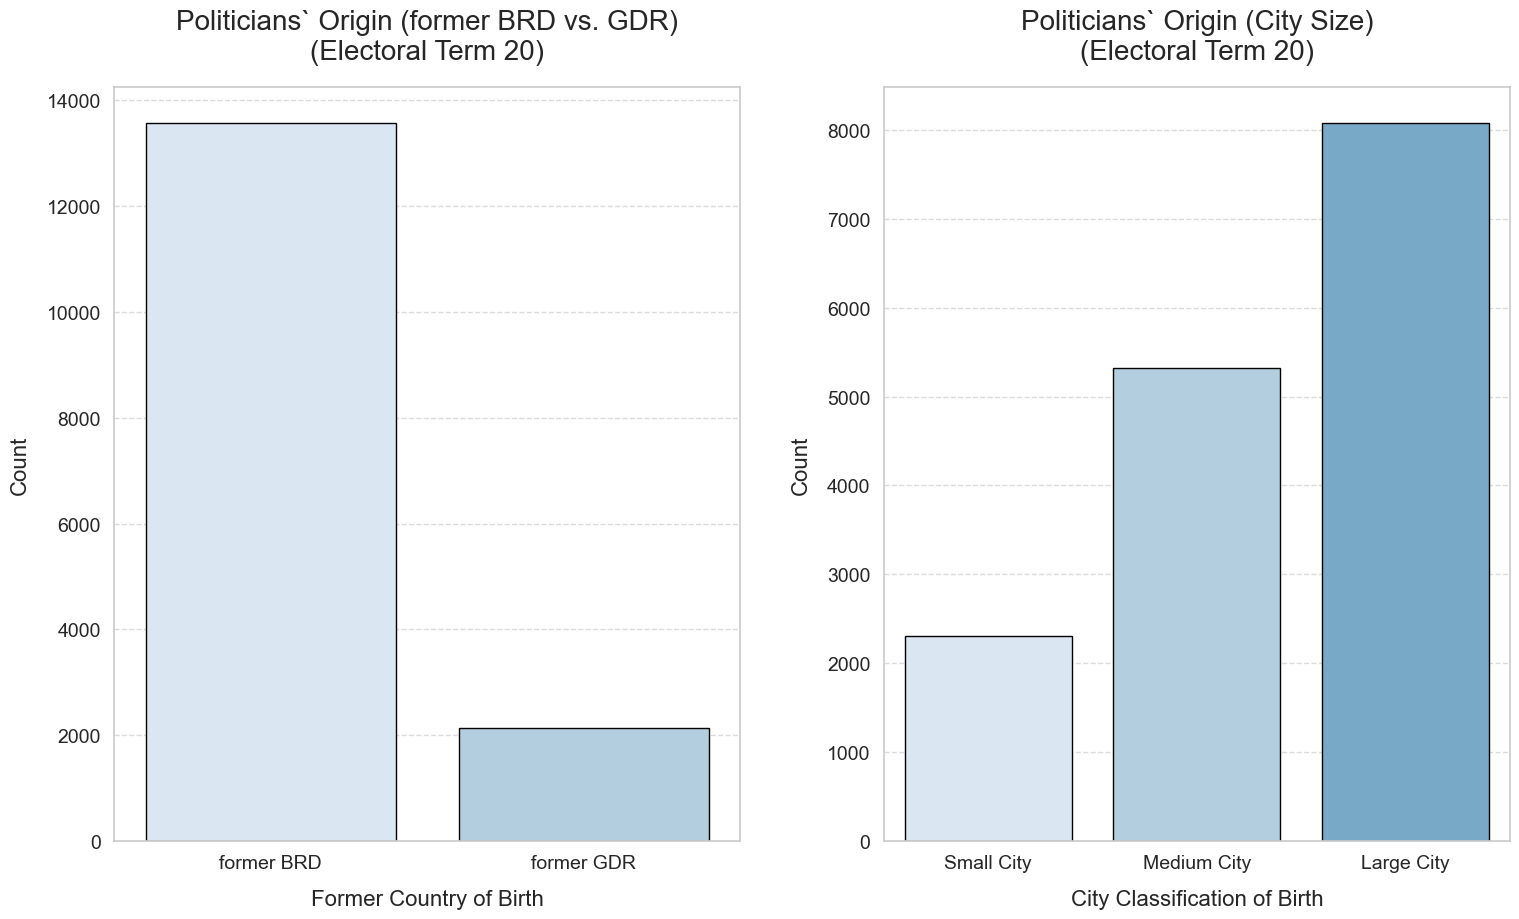

In [81]:
# Set up Seaborn style
sns.set(style="whitegrid")
blue_palette = sns.color_palette("Blues", n_colors=5)

# --- Plotting the distribution of Former Country of Birth for Electoral Term 20 ---
fig, axes = plt.subplots(1, 2, figsize=(16, 10))  # Set up side-by-side subplots

# Left Plot: Former Country of Birth
sns.countplot(
    data=content_df_features_cities_20, 
    x='Former Country', 
    palette=blue_palette, 
    edgecolor='black',
    order=content_df_features_cities_20['Former Country'].value_counts().index, 
    ax=axes[0]
)

# Title and axis labels for the left plot
axes[0].set_title('Politicians` Origin (former BRD vs. GDR)\n(Electoral Term 20)', fontsize=20, pad=20)
axes[0].set_xlabel('Former Country of Birth', fontsize=16, labelpad=12)
axes[0].set_ylabel('Count', fontsize=16, labelpad=12)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Right Plot: City Classification of Birth
sns.countplot(
    data=content_df_features_cities_20, 
    x='City Classification', 
    palette=blue_palette, 
    edgecolor='black',
    order=['Small City', 'Medium City', 'Large City'], 
    ax=axes[1]
)

# Title and axis labels for the right plot
axes[1].set_title('Politicians` Origin (City Size)\n(Electoral Term 20)', fontsize=20, pad=20)
axes[1].set_xlabel('City Classification of Birth', fontsize=16, labelpad=12)
axes[1].set_ylabel('Count', fontsize=16, labelpad=12)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout(pad=3)  # Add padding for readability
plt.savefig("distribution_former_country_city_classification_electoral_term_20.png", format='png', dpi=300, bbox_inches='tight')
plt.show()


### 5.5 Topic Analysis

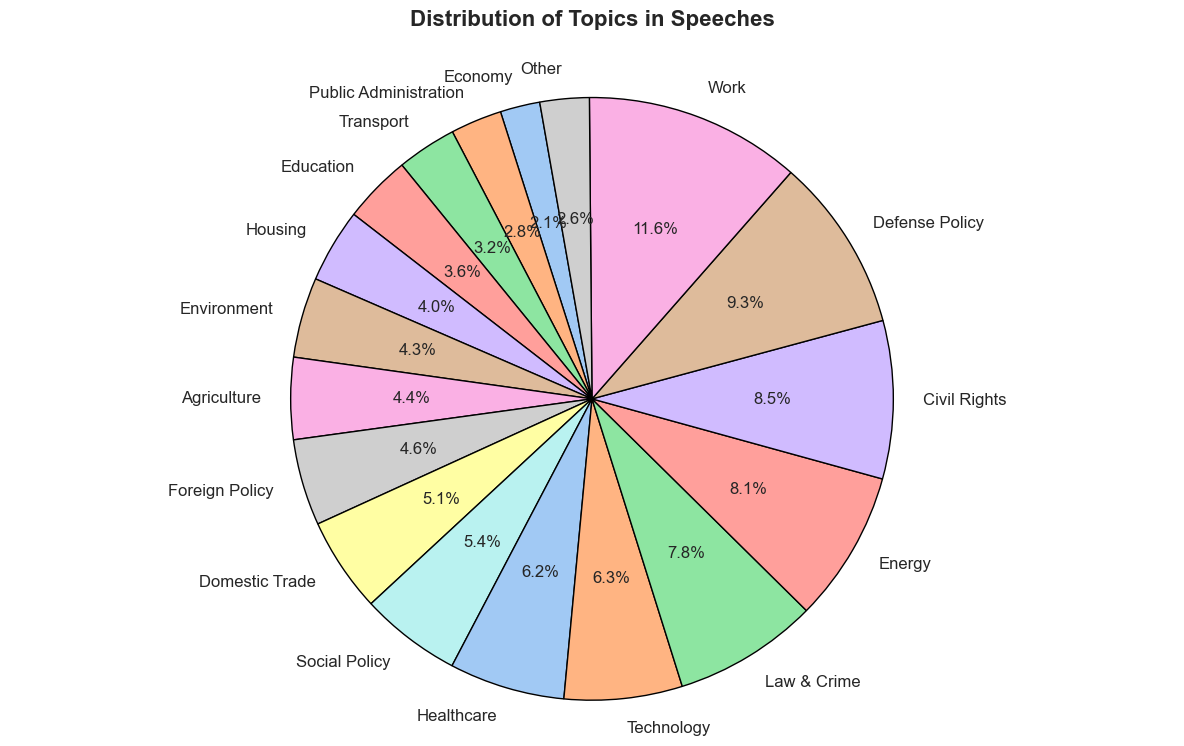

In [82]:
# Filter out "no topic" and calculate category percentages
content_df_features_without_no_topic = content_df_features_topic[(content_df_features_topic['main_category'] != 'no topic') & (content_df_features_topic['electoral_term'] == 20)&(content_df_features_topic['position_short'] != 'Presidium of Parliament')]


# Count the number of speeches in each category
category_counts = content_df_features_without_no_topic['main_category'].value_counts()
total_count = category_counts.sum()

# Group categories with less than 2% into "Other"
threshold = 0.02 * total_count  # Threshold for grouping
category_counts_grouped = category_counts.copy()
category_counts_grouped['Other'] = category_counts_grouped[category_counts_grouped < threshold].sum()
category_counts_grouped = category_counts_grouped[category_counts_grouped >= threshold]

# Place "Other" at the end
category_counts_grouped = category_counts_grouped.sort_values(ascending=True)
if 'Other' in category_counts_grouped.index:
    other_value = category_counts_grouped['Other']
    category_counts_grouped = category_counts_grouped.drop('Other')
    category_counts_grouped['Other'] = other_value

# Labels for the pie chart
labels = category_counts_grouped.index

# Plot the pie chart
plt.figure(figsize=(12, 8))
colors = sns.color_palette('pastel', len(category_counts_grouped))  # Use a pastel color palette
wedges, texts, autotexts = plt.pie(
    category_counts_grouped,
    labels=labels,
    autopct='%1.1f%%',
    startangle=100,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},  # Add black borders for better separation
    textprops={'fontsize': 12}  # Adjust text size for readability
)

# Add a title and styling
plt.title('Distribution of Topics in Speeches', fontsize=16, weight='bold', y=1.05)  # Add more space between the title and the chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent label/title overlap

# save plot
plt.savefig('topic_distribution.png', dpi=300)
# Show the plot
plt.show()

## 6. Final DF Download

In [83]:
pd.set_option('display.max_columns', None)

print(len(content_df_features_cities))
content_df_features_cities.head()

969857


,id,electoral_term,session,first_name,document_url,last_name,faction_id,position_short,position_long,politician_id,top_item,top_title,speech_content,date,faction,year,speech_length,age,gender,tenure,topic,main_category,sub_category,Stadt,Former Country,City Classification
0,0,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Meine Damen und Herren! Ich eröffne die 2. Sit...,1949-09-11,CDU/CSU,1949,546,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City
1,1,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,arnold,-1,Guest,präsident des bundesrats,-1,NaN,NaN,"Der Bundesrat ist versammelt, Herr Präsident.",1949-09-11,NaN,1949,45,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich danke für diese Erklärung. Ich stelle dami...,1949-09-11,CDU/CSU,1949,895,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City
3,3,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,heuss,-1,Guest,bundespräsident,-1,NaN,NaN,"Ja, ich habe den Wunsch.",1949-09-11,NaN,1949,24,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,,https://dip21.bundestag.de/dip21/btp/01/01002.pdf,köhler,5,Presidium of Parliament,präsident,11001150,NaN,NaN,Ich erteile dem Herrn Bundespräsidenten das Wort.,1949-09-11,CDU/CSU,1949,49,57.0,männlich,0.0,NaN,NaN,NaN,Erfurt,former GDR,Large City


In [ ]:
import pickle

#content_df_features_cities.to_pickle('final_feature_df.pkl')

# Save the DataFrame to a pickle file
with open('final_feature_df.pkl', 'wb') as file:
    pickle.dump(content_df_features_cities, file)

content_df_features_cities.to_csv('final_feature_df.csv', index=False)

